In [1]:
%run functions.ipynb

## Non-Ovelapping , Amplify test

In [2]:
# Generate Input PSD
fmin = 1; fmax = 5000; bwp = 1; loc = 0;
freq_spec,psd_spec = blwn(fmin,fmax,bwp,loc);
# Band Split
fi = np.linspace(min(freq_spec),max(freq_spec),10000);
pi = log_interp(fi,freq_spec,psd_spec);
dfi,dpi = band_split(fi,pi,2);
# Calculate FDS
fn,D  = FDS_dirlik(fi    ,pi      ,zeta=0.1,m=8,T=1,C=1);
fn,D1 = FDS_dirlik(dfi[0],dpi[0]*1,zeta=0.1,m=8,T=1,C=1);
fn,D2 = FDS_dirlik(dfi[1],dpi[1]*1,zeta=0.1,m=8,T=1,C=1);

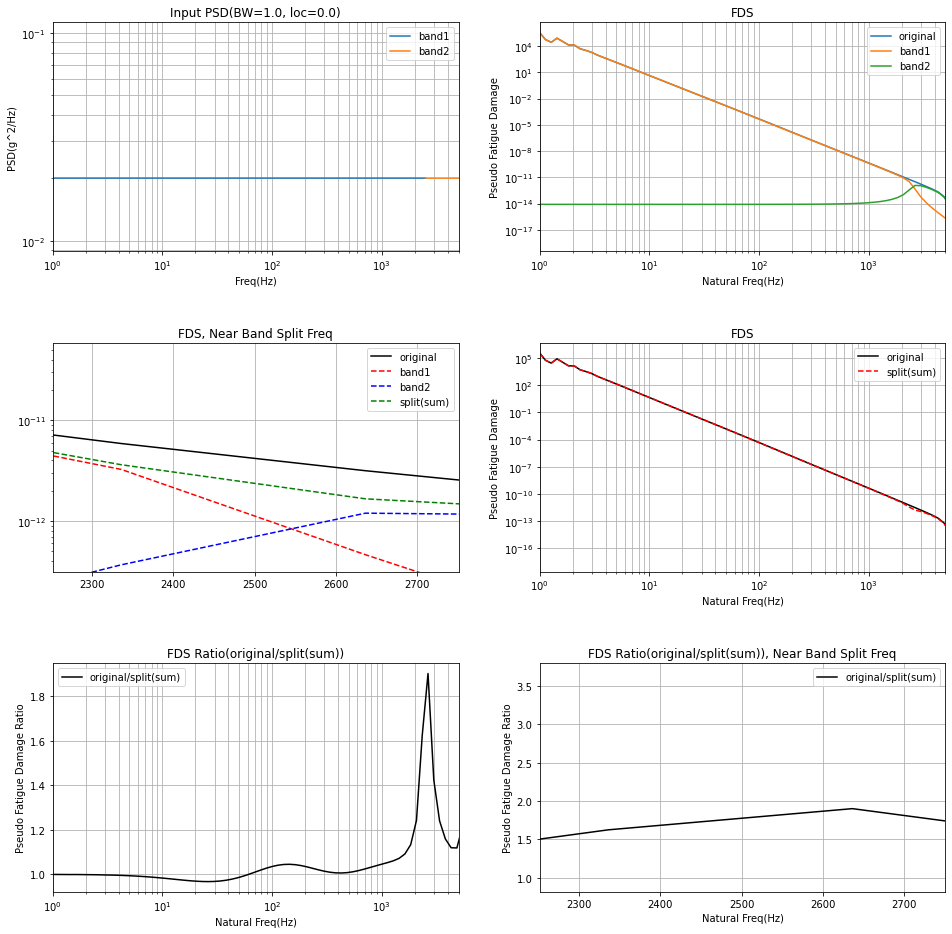

In [3]:
# Plot
plt.figure(figsize=(16,16));
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
plt.subplot(321);
plt.plot(dfi[0],dpi[0],label='band1'); plt.plot(dfi[1],dpi[1],label='band2'); plt.legend();
plt.xscale('log'); plt.yscale('log'); plt.xlim(fmin,fmax); plt.title('Input PSD(BW=%.1f, loc=%.1f)'%(bwp,loc)); plt.xlabel('Freq(Hz)'); plt.ylabel('PSD(g^2/Hz)');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(322);
plt.plot(fn,D,label='original'); plt.plot(fn,D1,label='band1'); plt.plot(fn,D2,label='band2'); 
plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(323);
xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
ylim1 = min(D[(fn>xlim1)&(fn<xlim2)])*0.1; 
ylim2 = max(D[(fn>xlim1)&(fn<xlim2)])*10; 
plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1,'r--',label='band1'); plt.plot(fn,D2,'b--',label='band2'); 
plt.plot(fn,D1+D2,'g--',label='split(sum)');  plt.yscale('log');
plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
plt.title('FDS, Near Band Split Freq');
plt.grid(b=True, which='major', linestyle='-');
plt.subplot(324);
plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1+D2,'r--',label='split(sum)');  
plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(325);
rD = D/(D1+D2);
plt.plot(fn,rD,'k-',label='original/split(sum)');
plt.legend(); plt.xlim(fmin,fmax);
plt.xscale('log'); plt.title('FDS Ratio(original/split(sum))'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(326);
plt.plot(fn,rD,'k-',label='original/split(sum)');
ylim1 = min(rD[(fn>xlim1)&(fn<xlim2)])*0.5; ylim2 = max(rD[(fn>xlim1)&(fn<xlim2)])*2;
plt.grid(which='both'); plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
plt.title('FDS Ratio(original/split(sum)), Near Band Split Freq'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');\
plt.grid(b=True, which='both', linestyle='-');
plt.savefig('blwn_BW%.1f_LOC%.1f_10d_8m_x1.png'%(bwp,loc), dpi=300);  # Bandwidth, Location, 1% damping FDS, m = 4, psd 1배
plt.close();

## Non-Ovelapping , Amplify Loop

<ipython-input-2-83b0ad4245c8>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,16));
<ipython-input-2-83b0ad4245c8>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,16));
<ipython-input-2-83b0ad4245c8>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16,1

KeyboardInterrupt: 

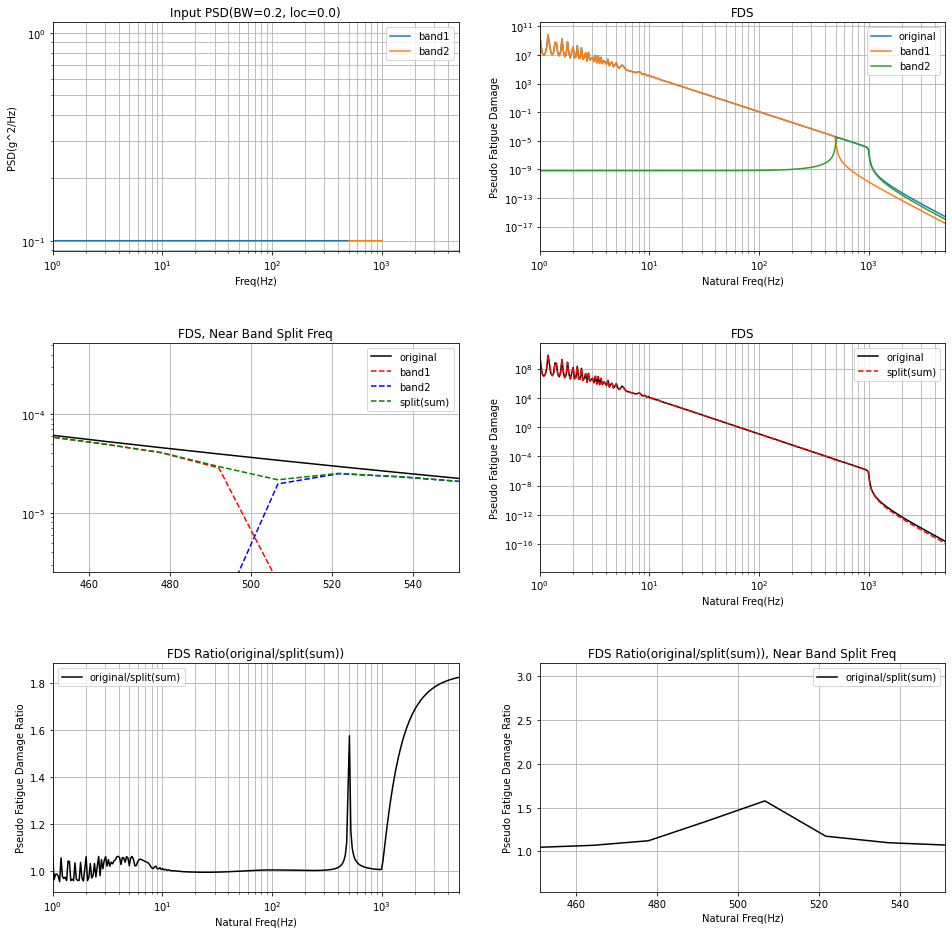

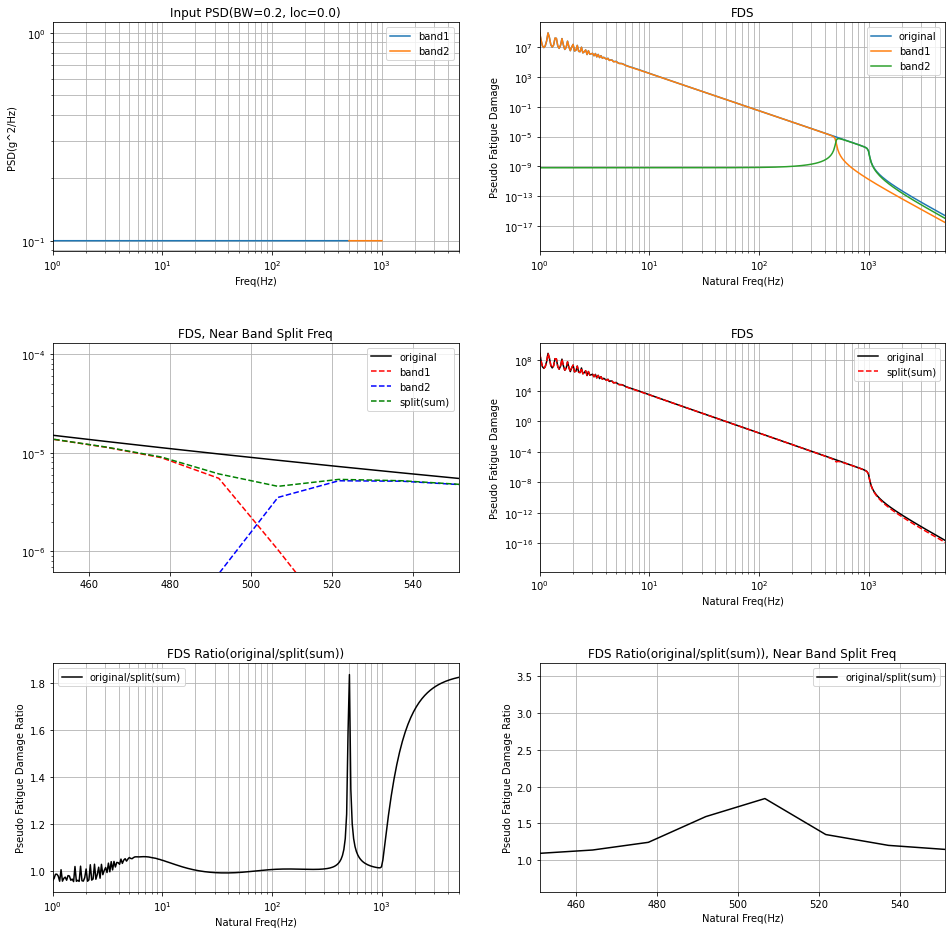

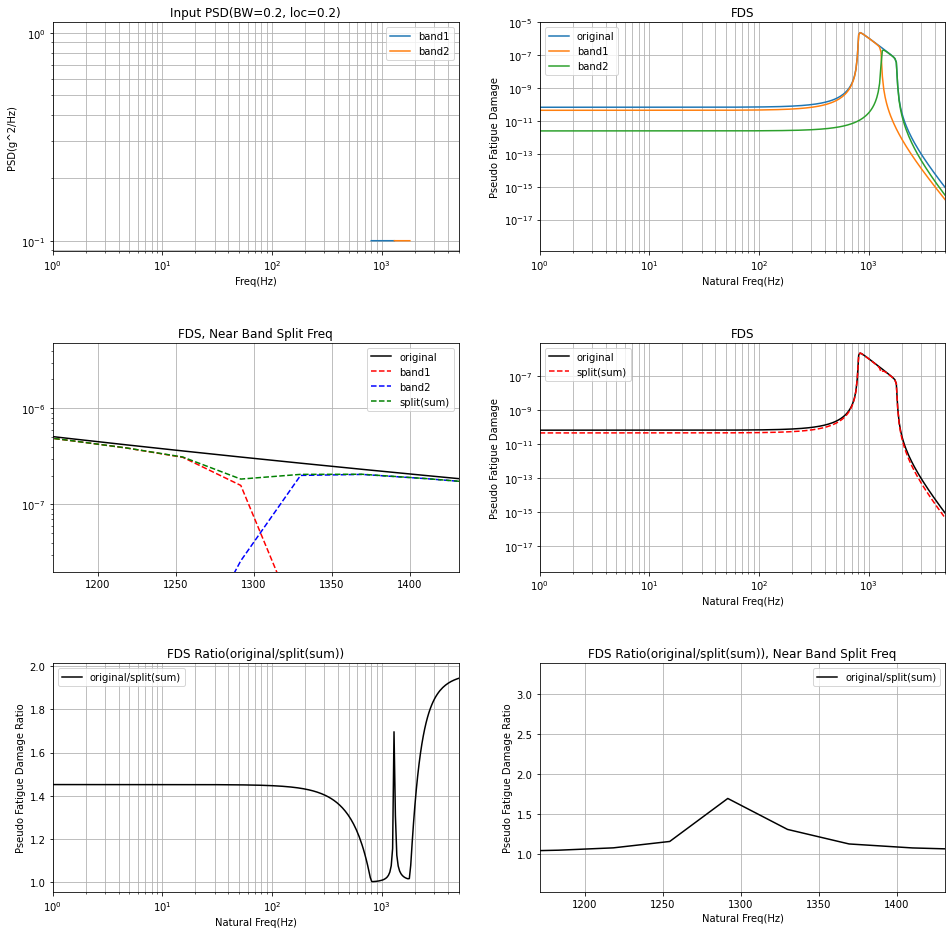

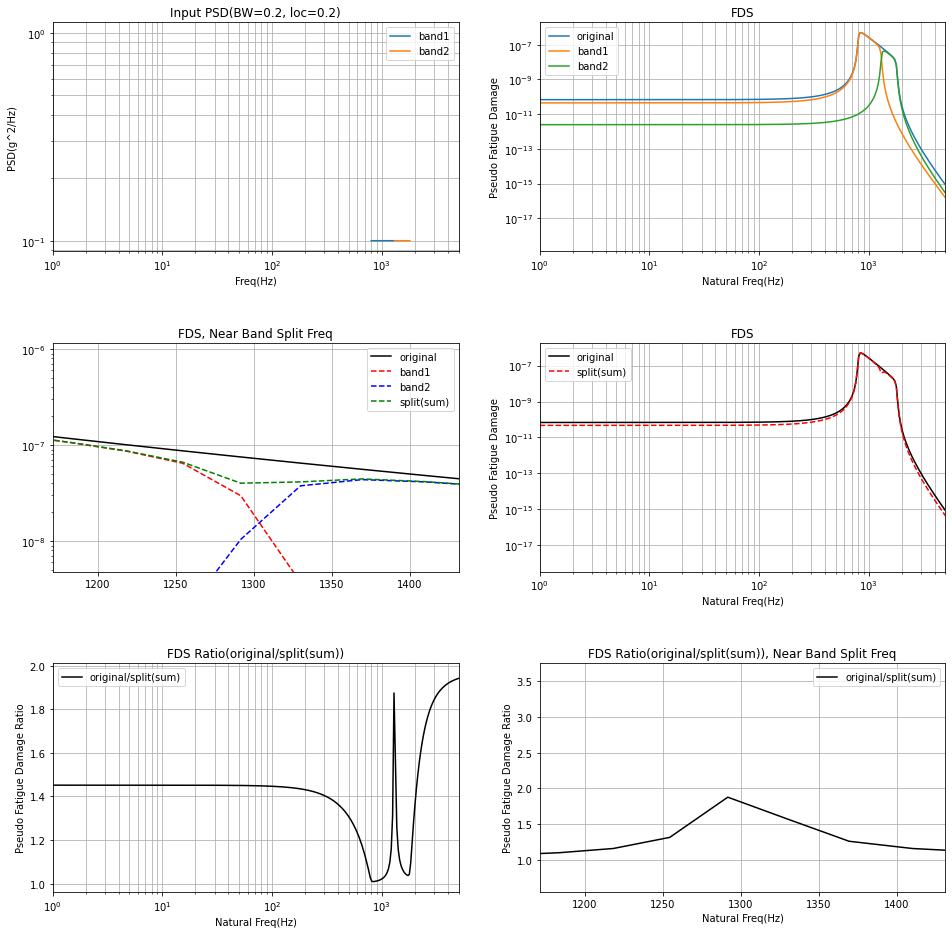

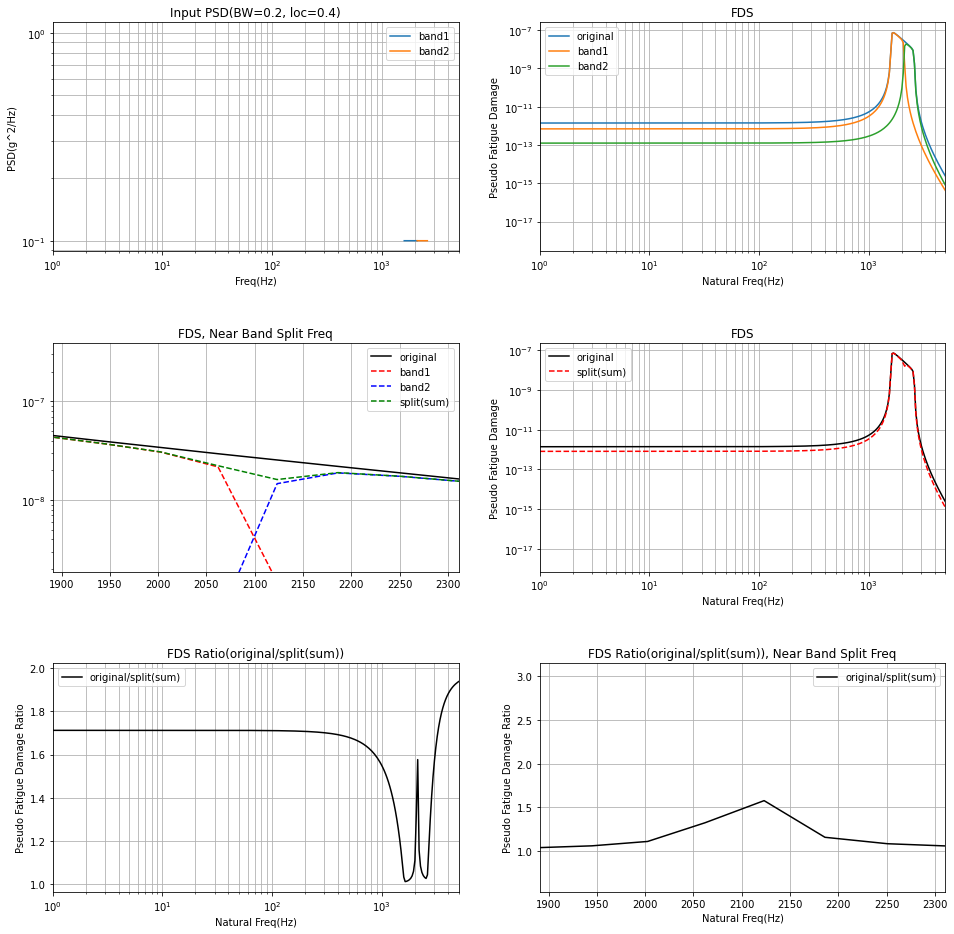

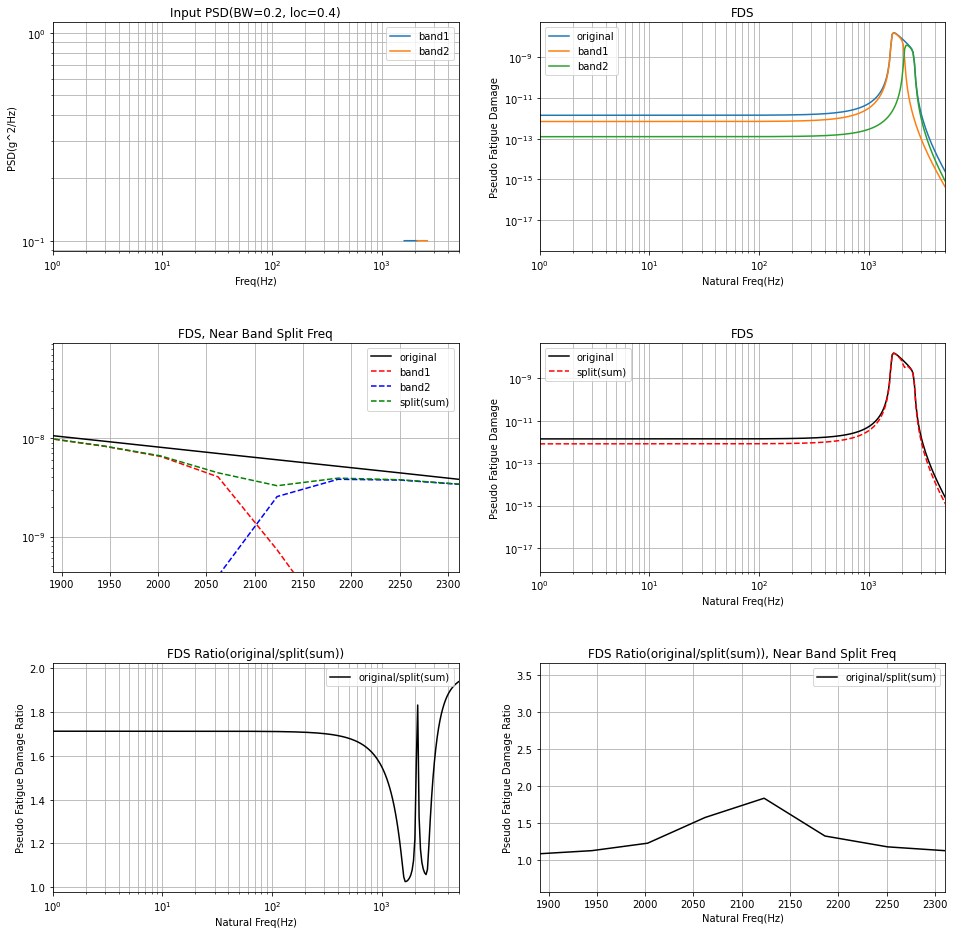

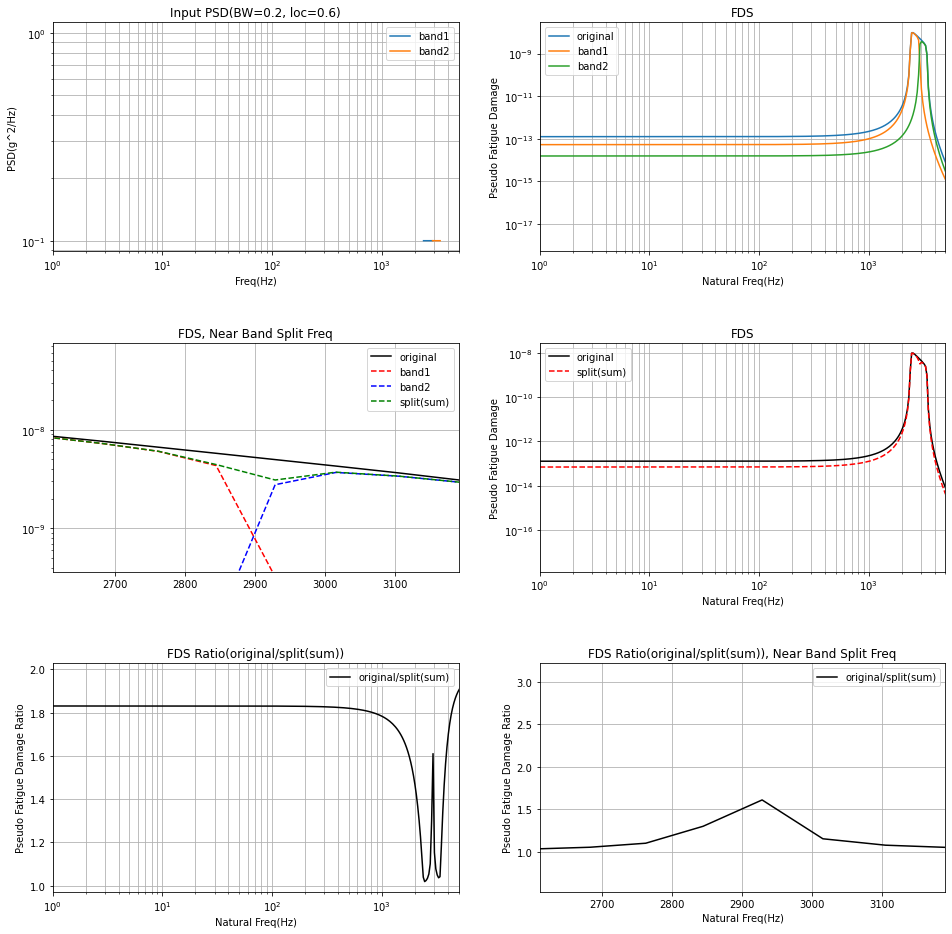

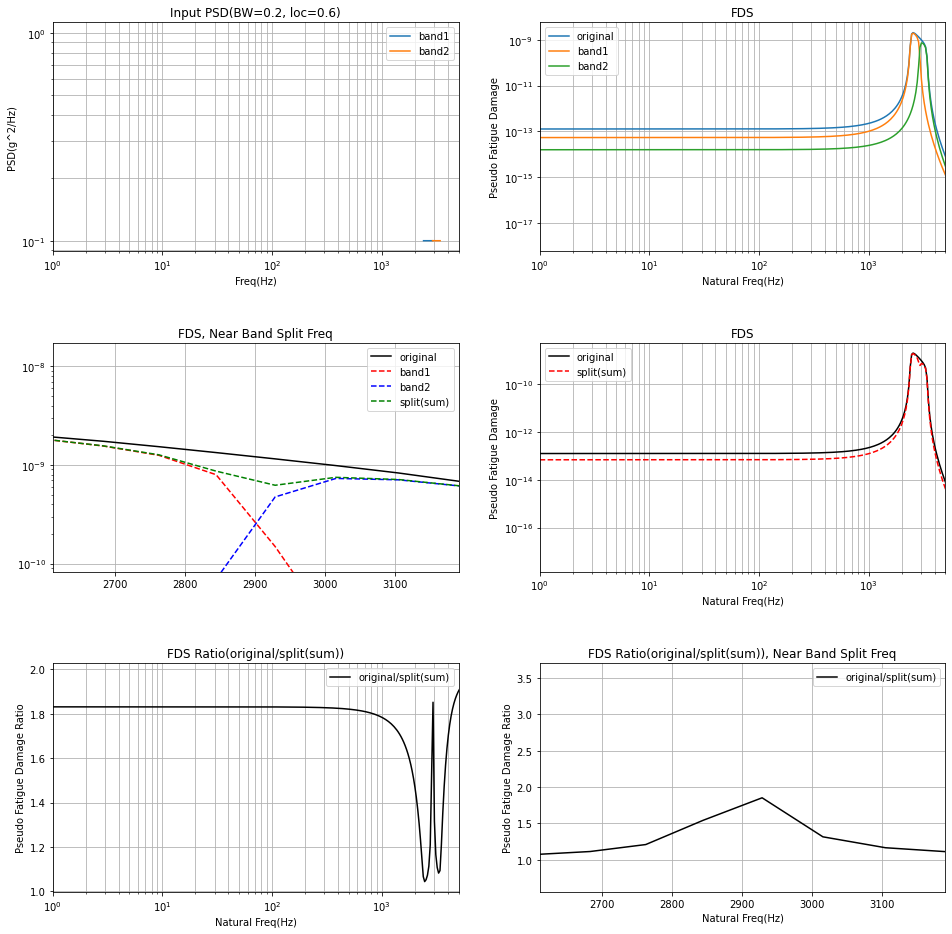

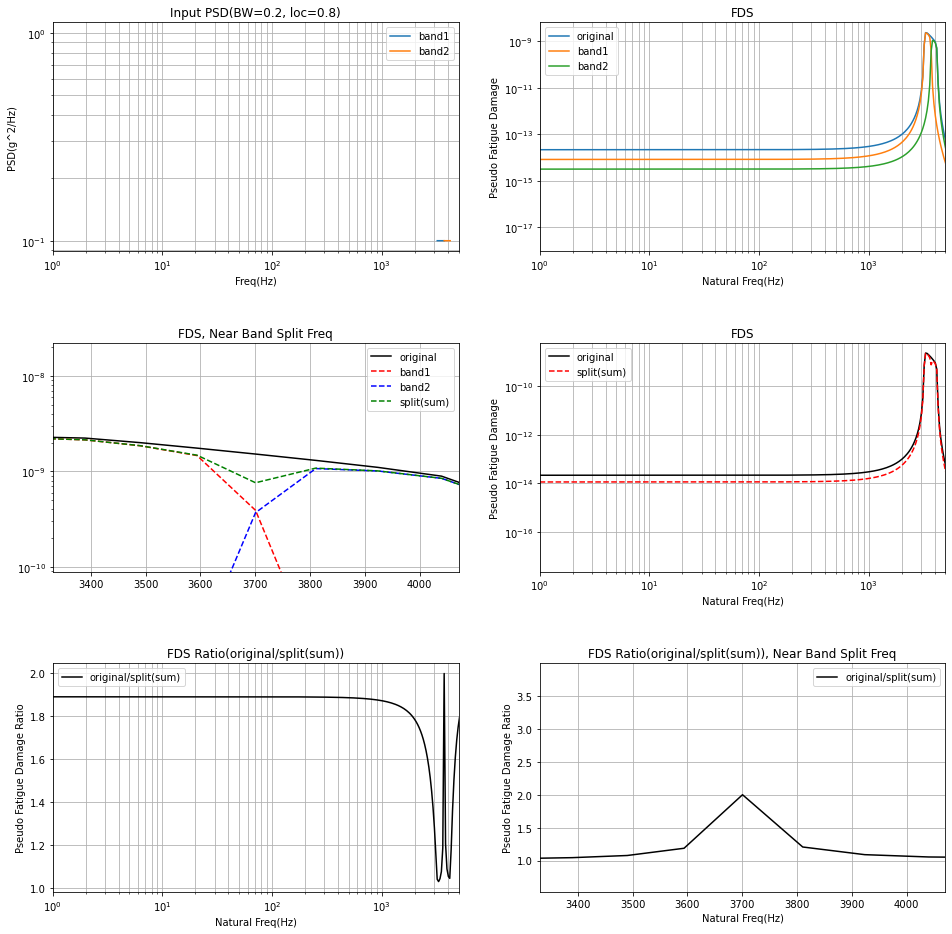

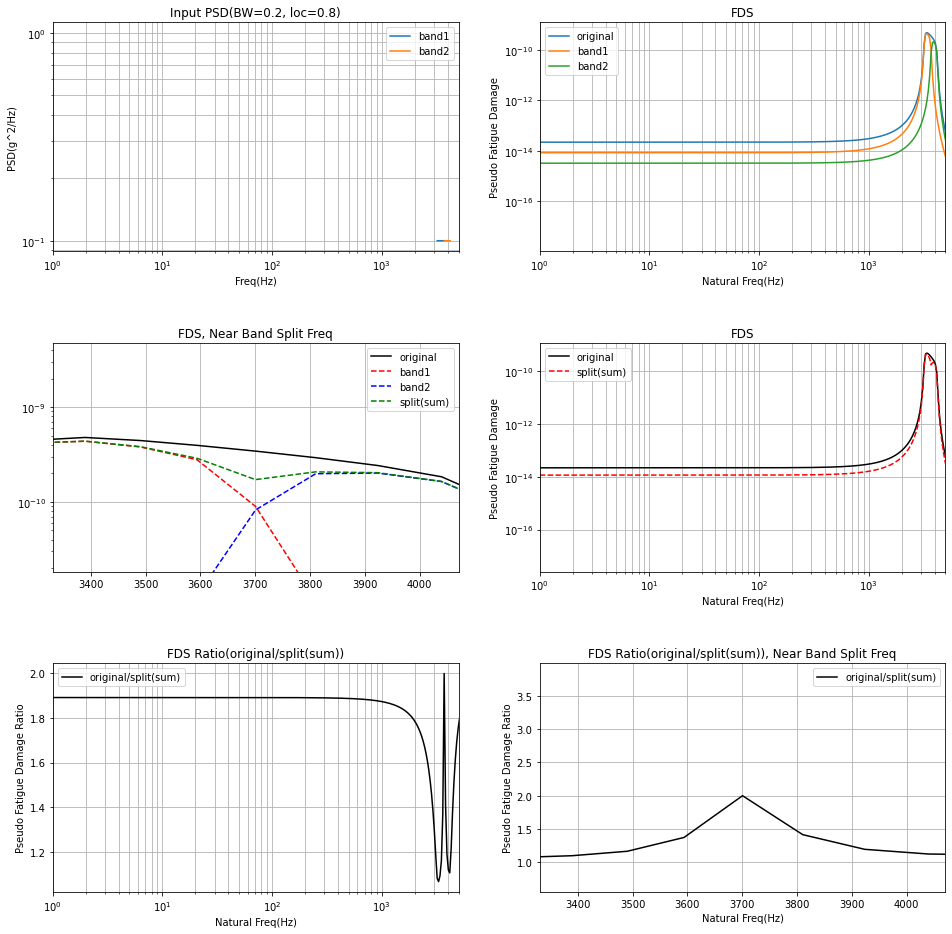

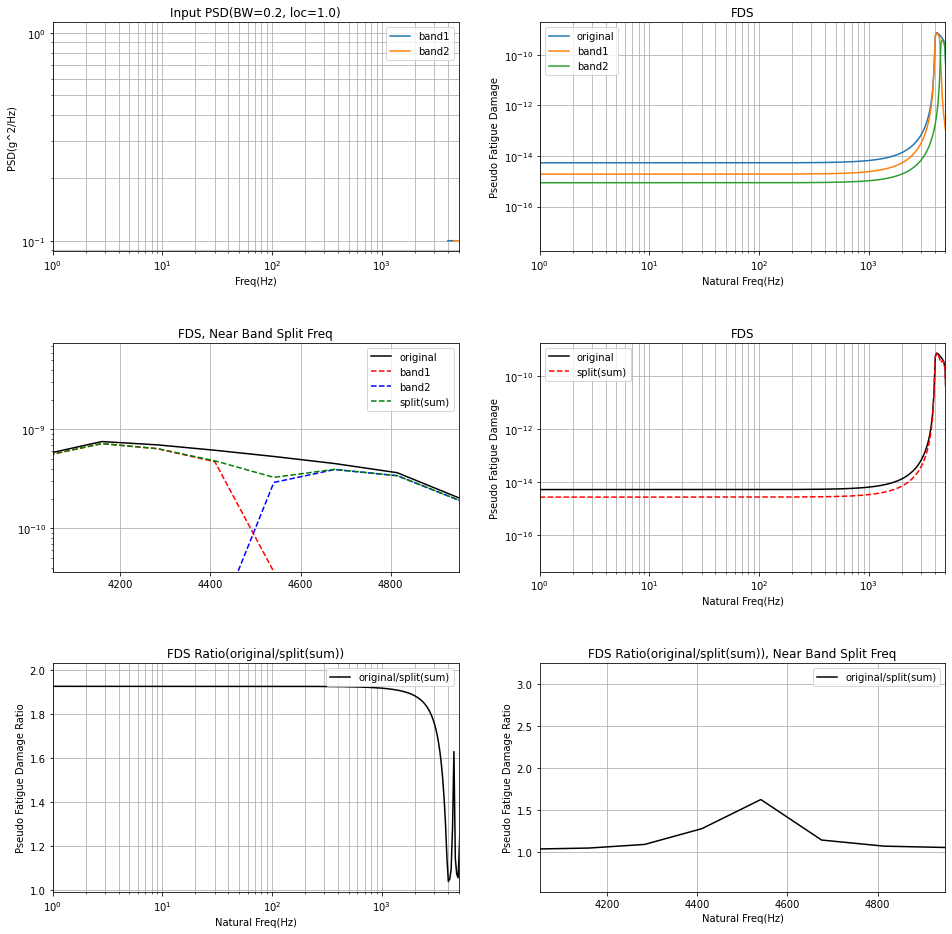

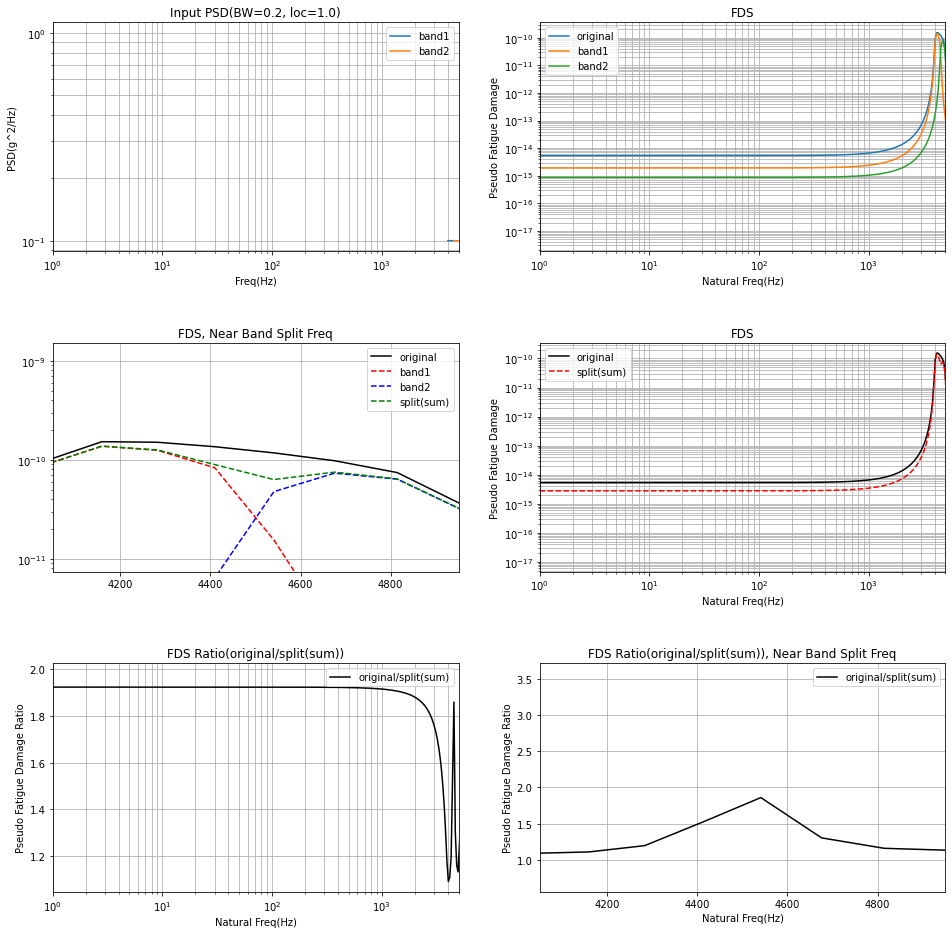

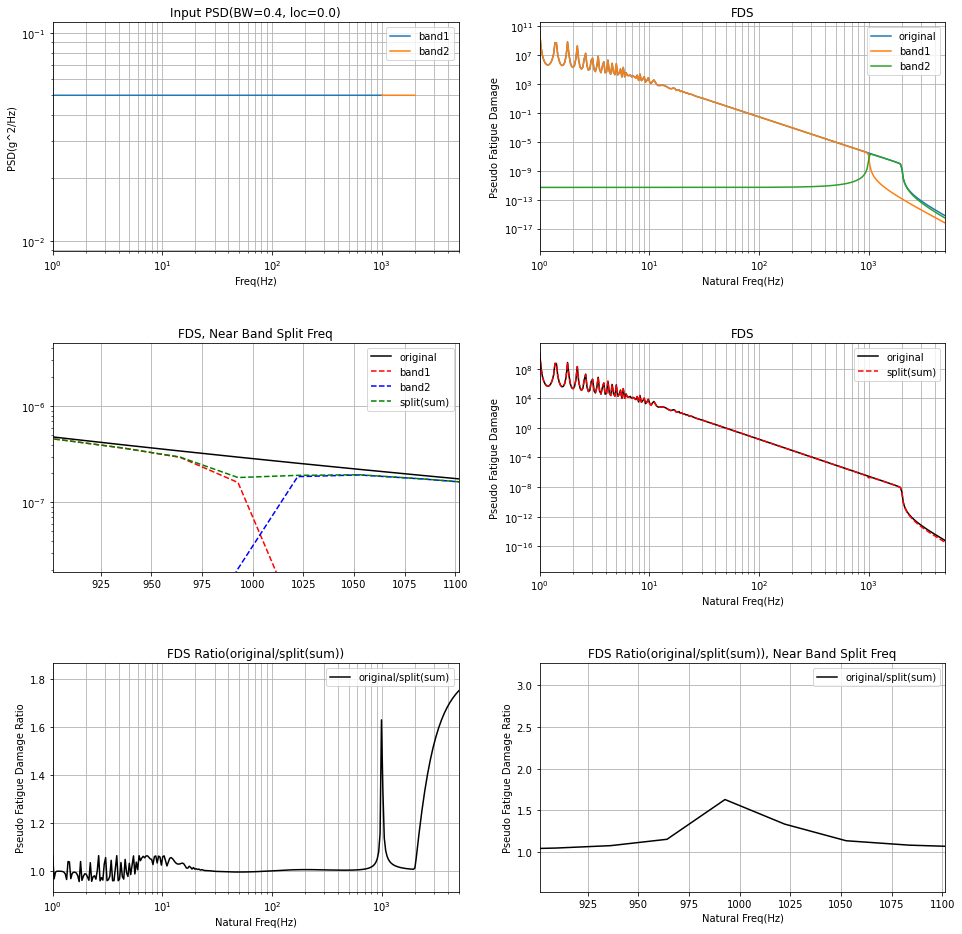

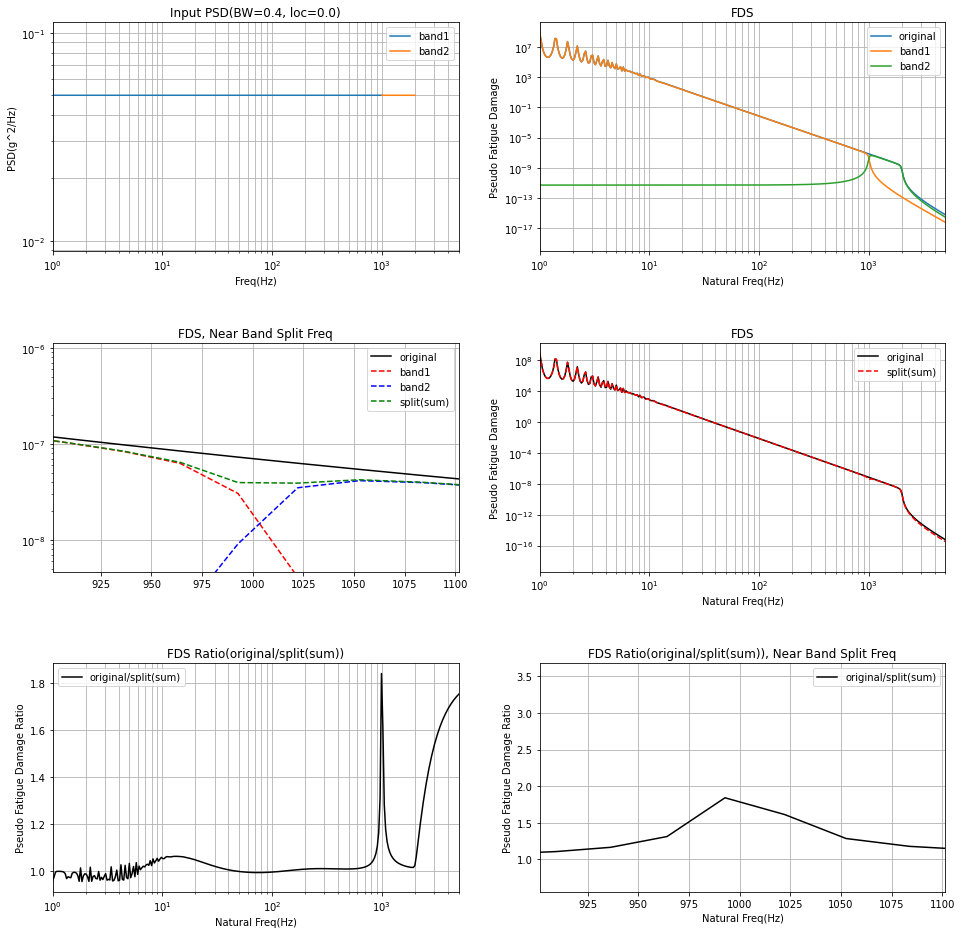

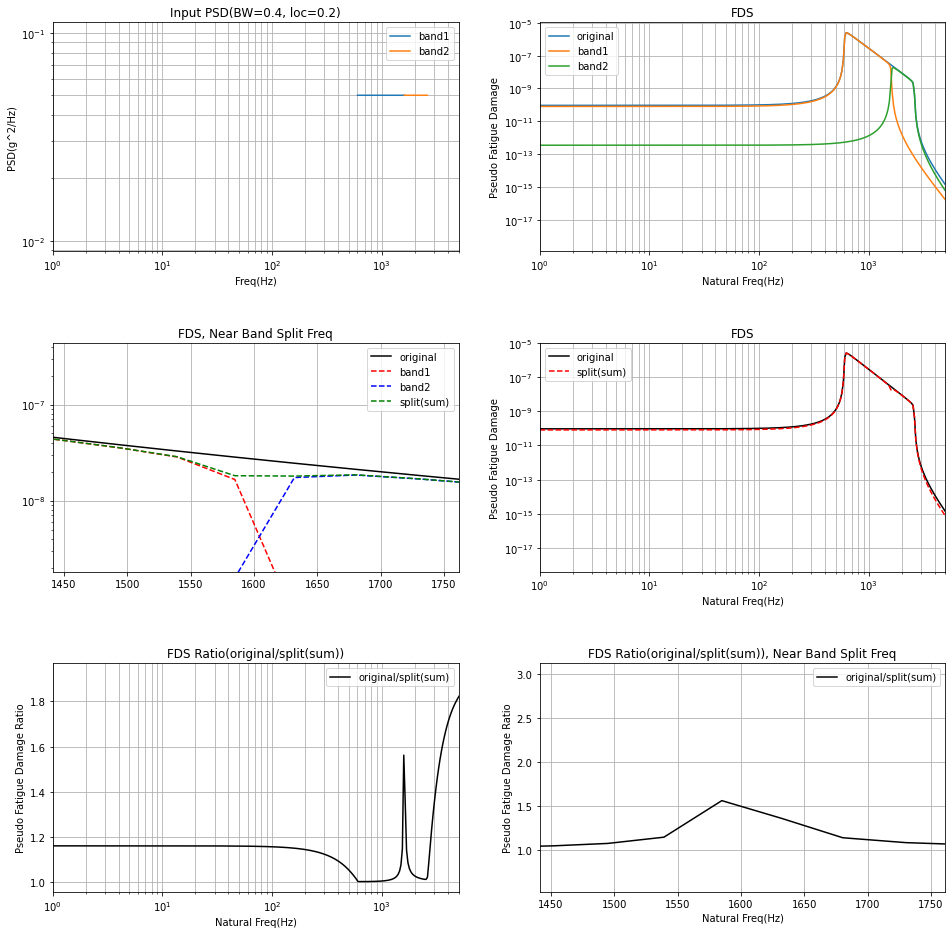

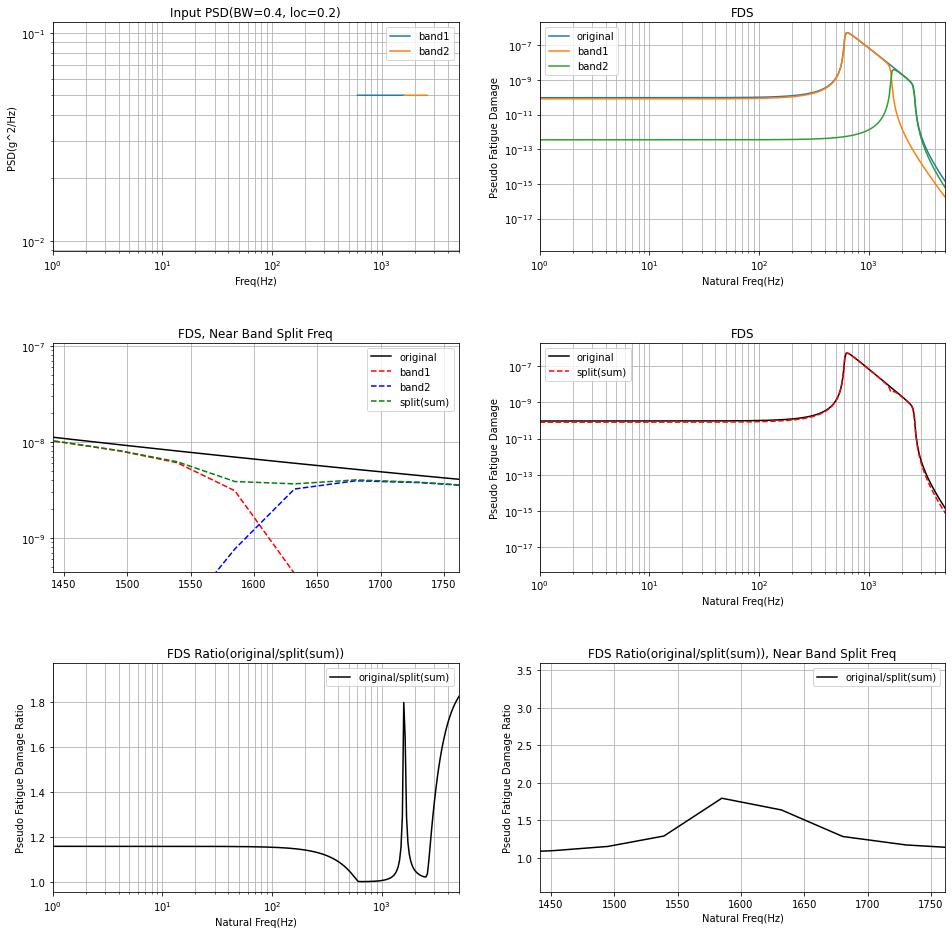

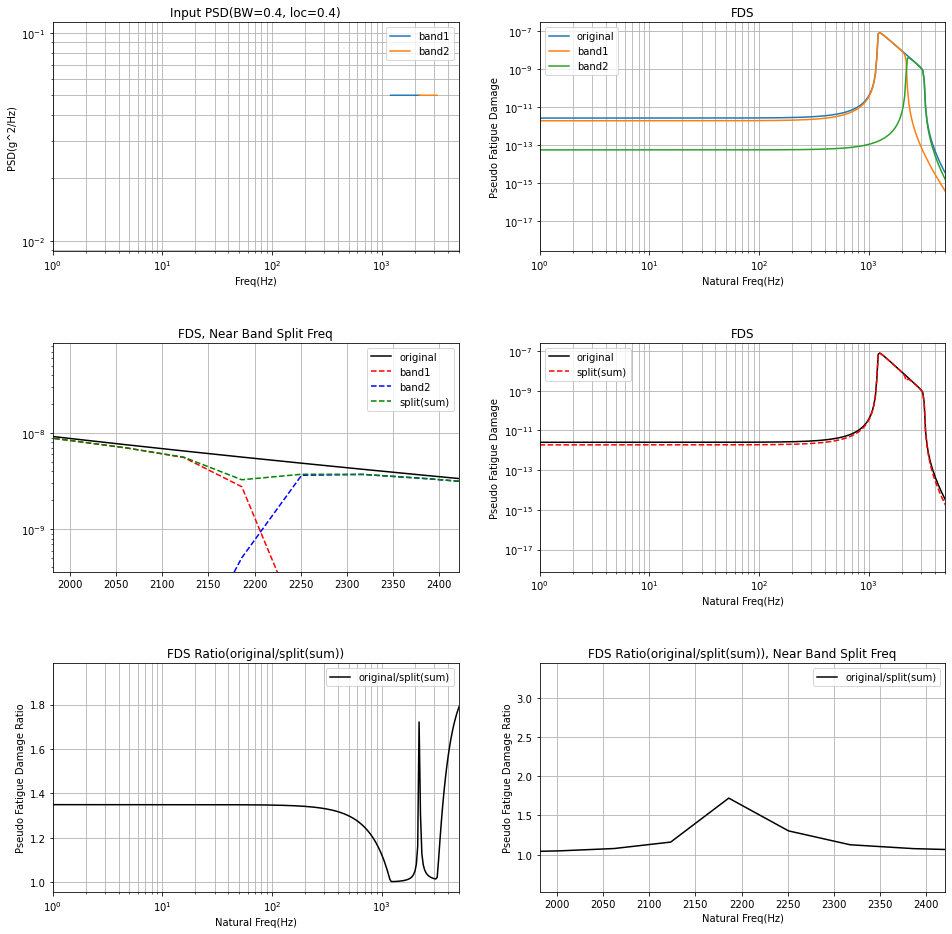

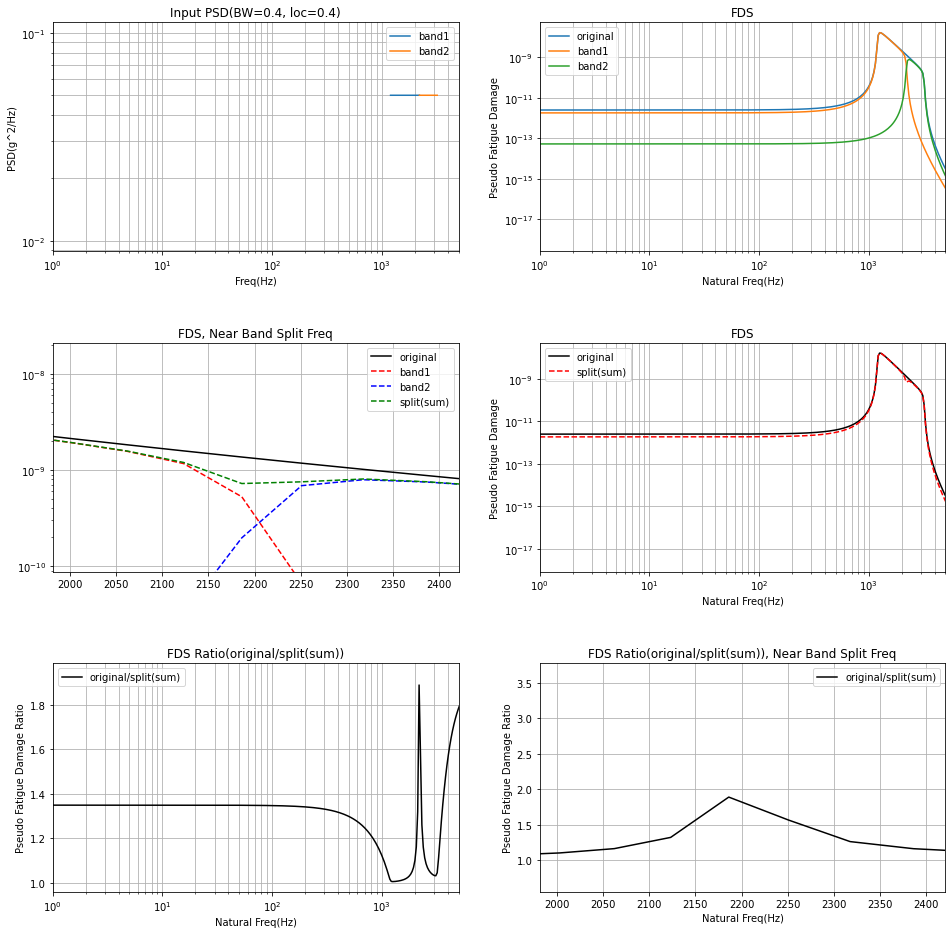

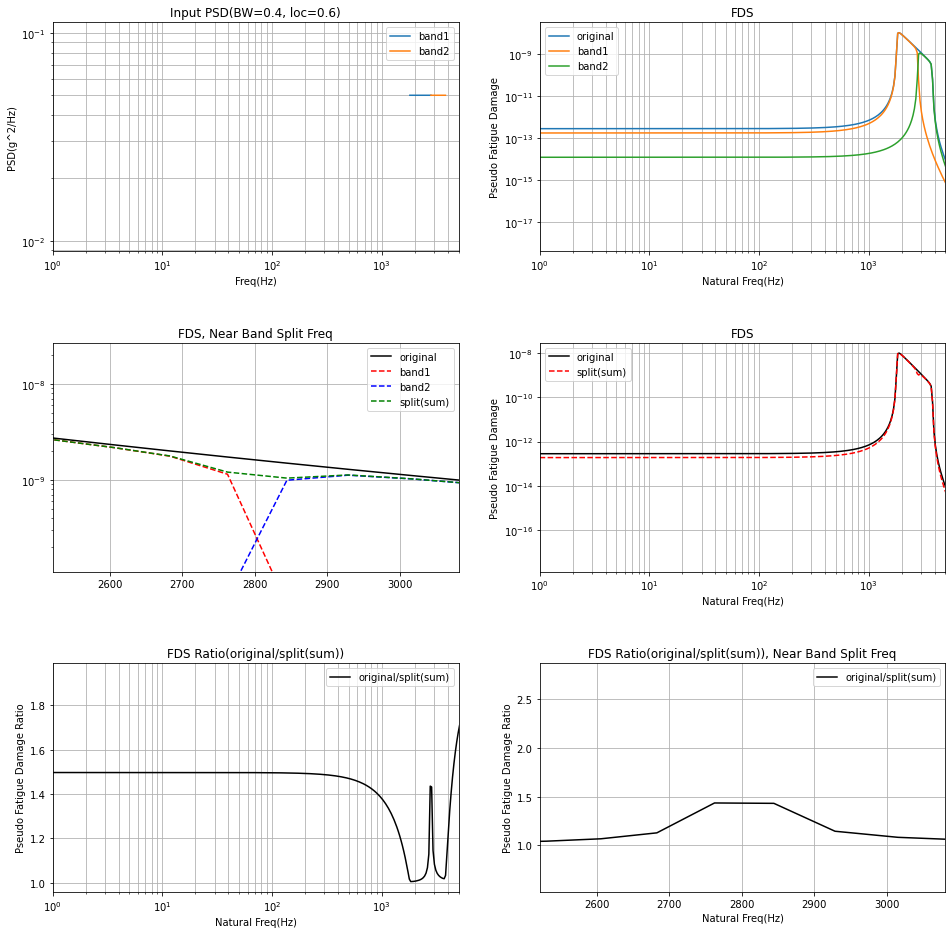

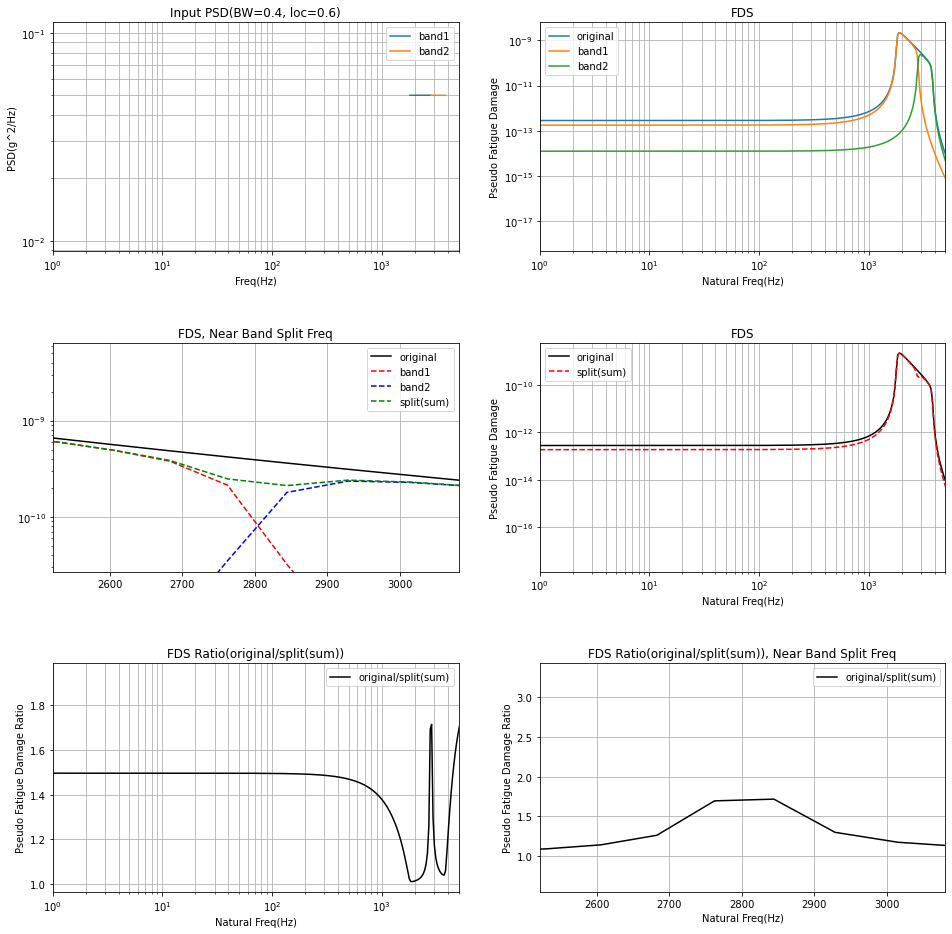

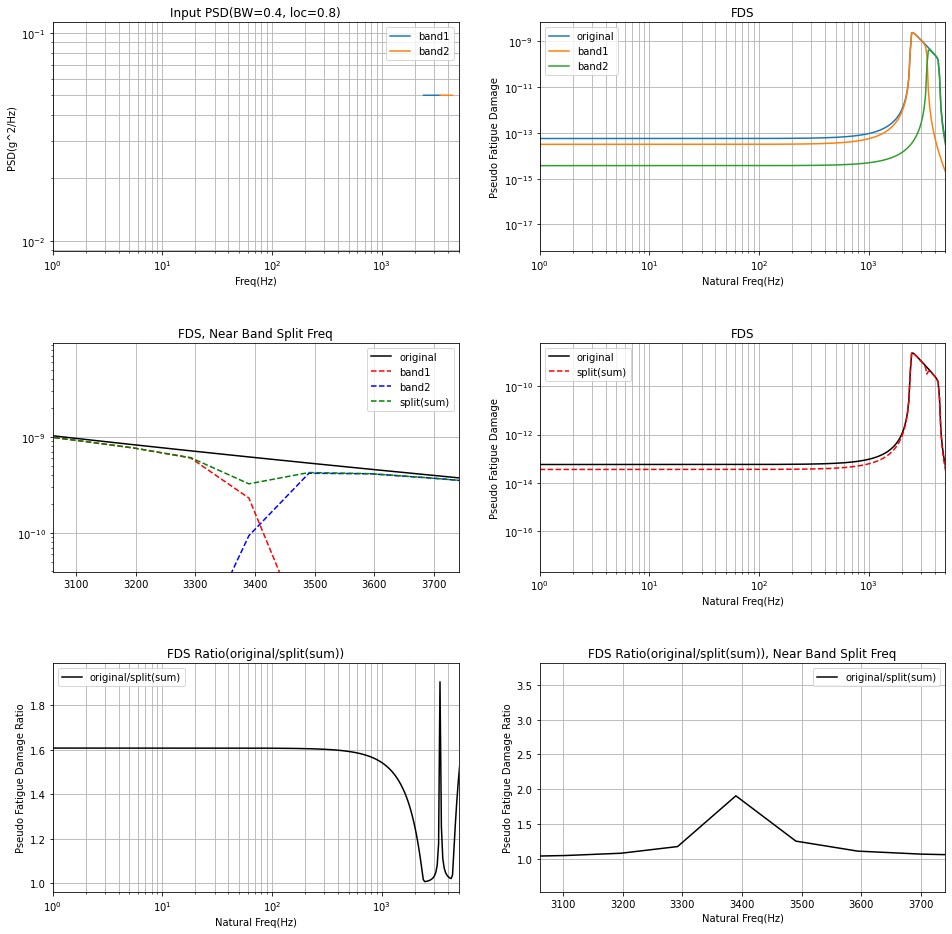

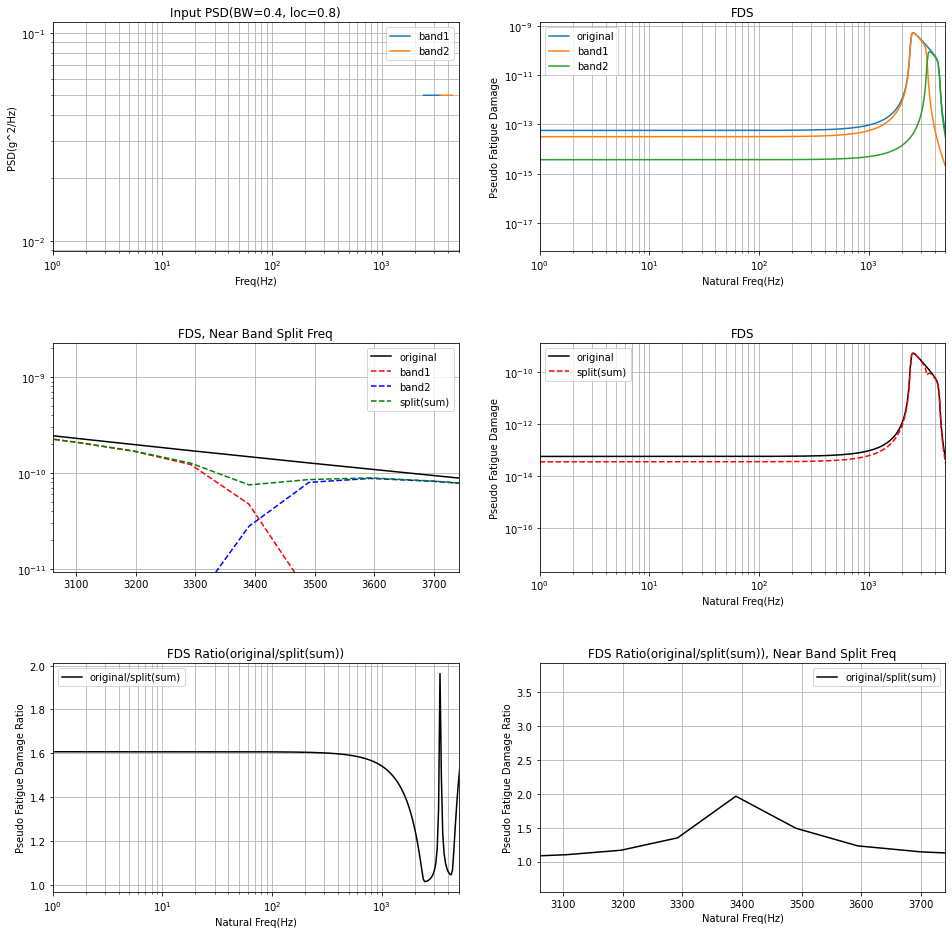

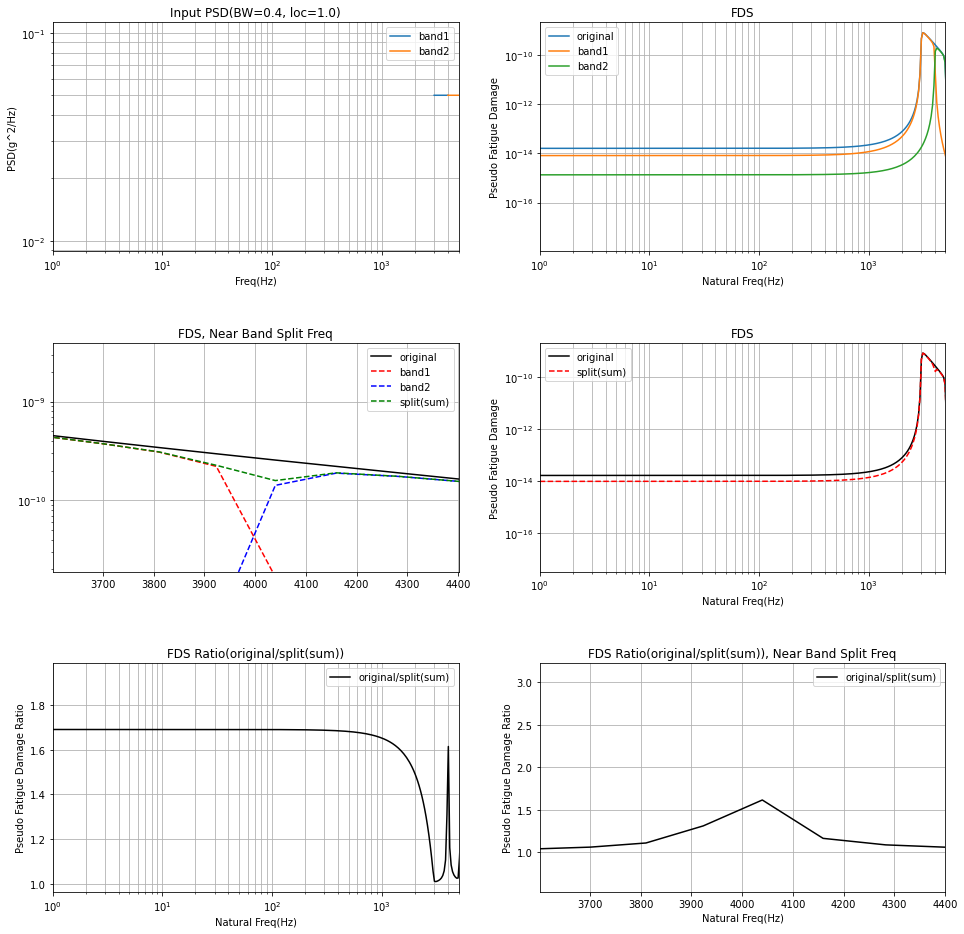

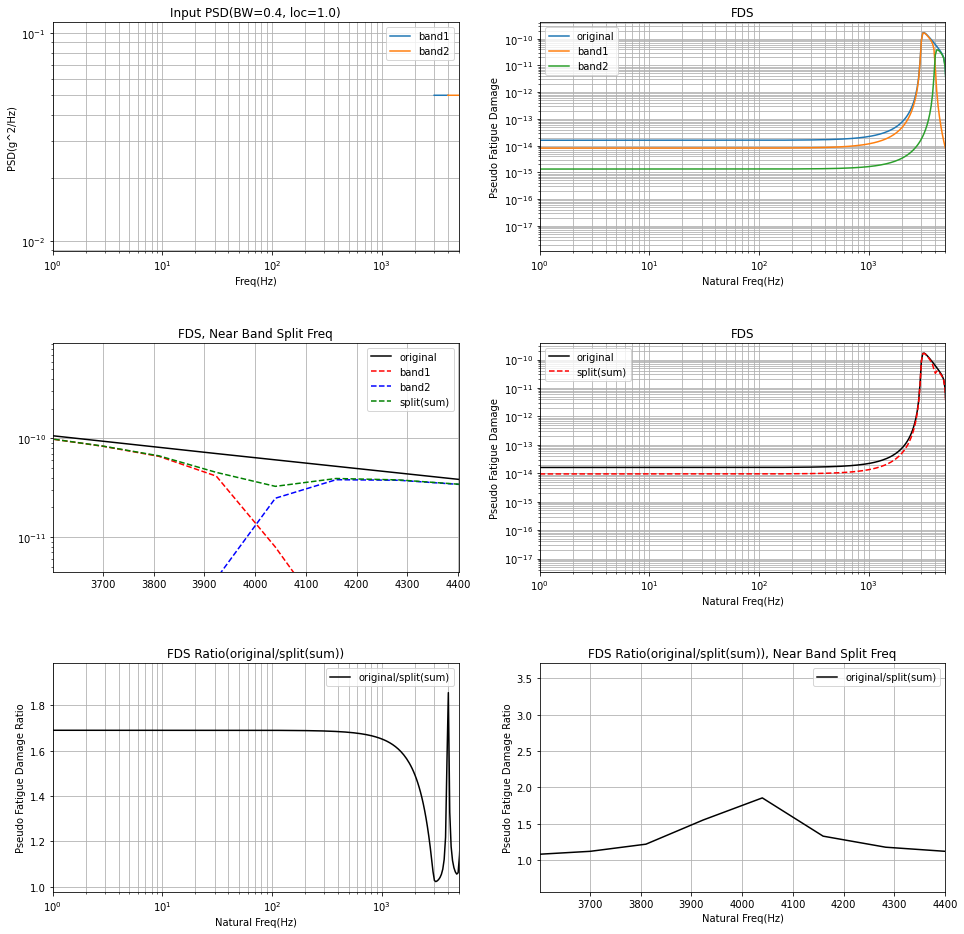

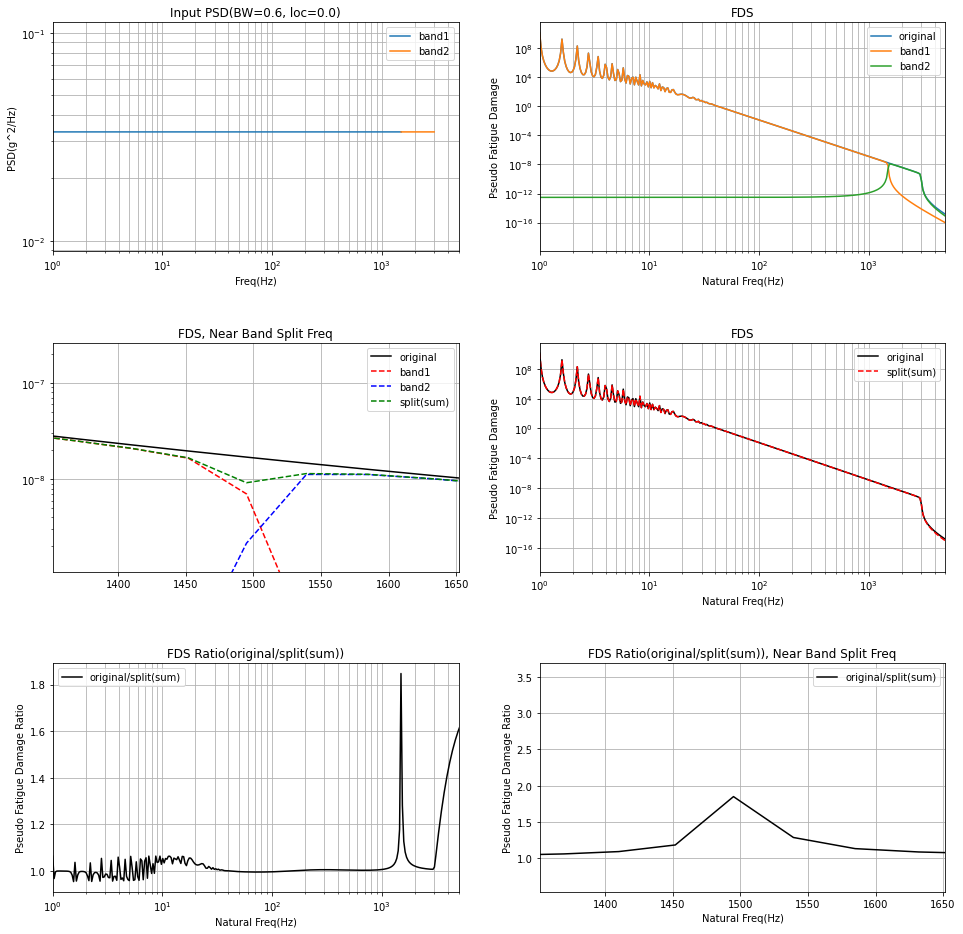

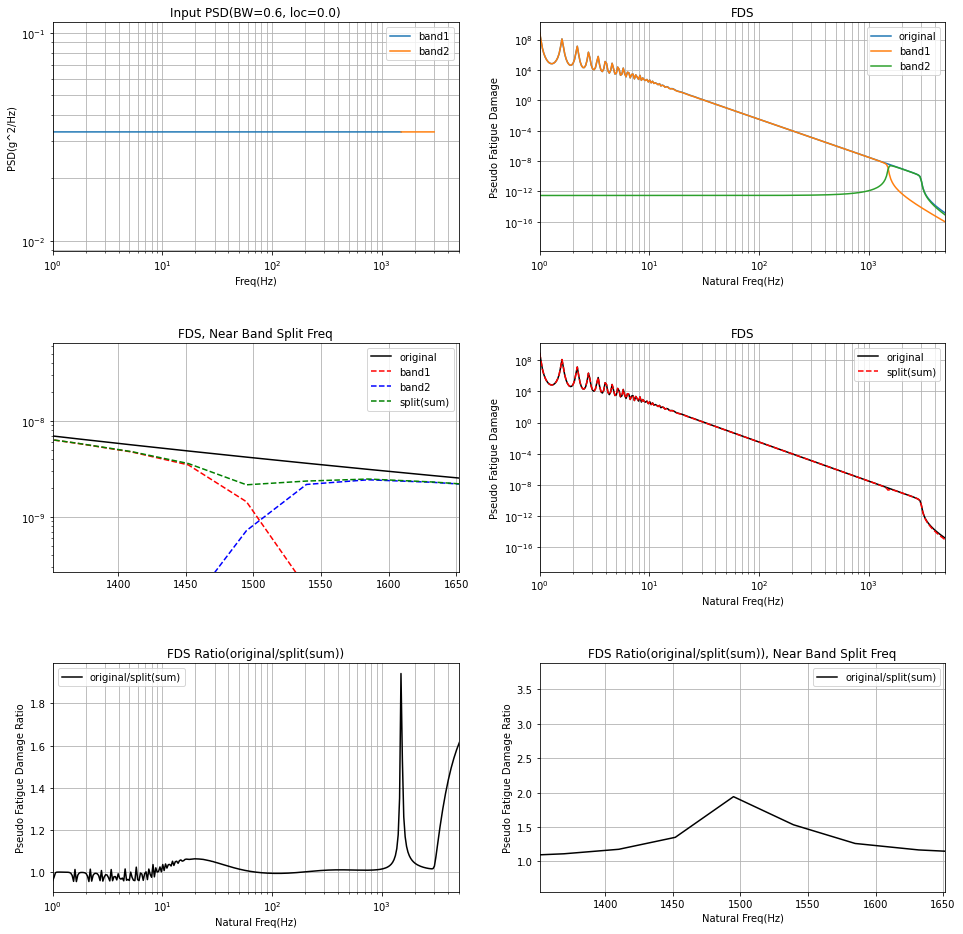

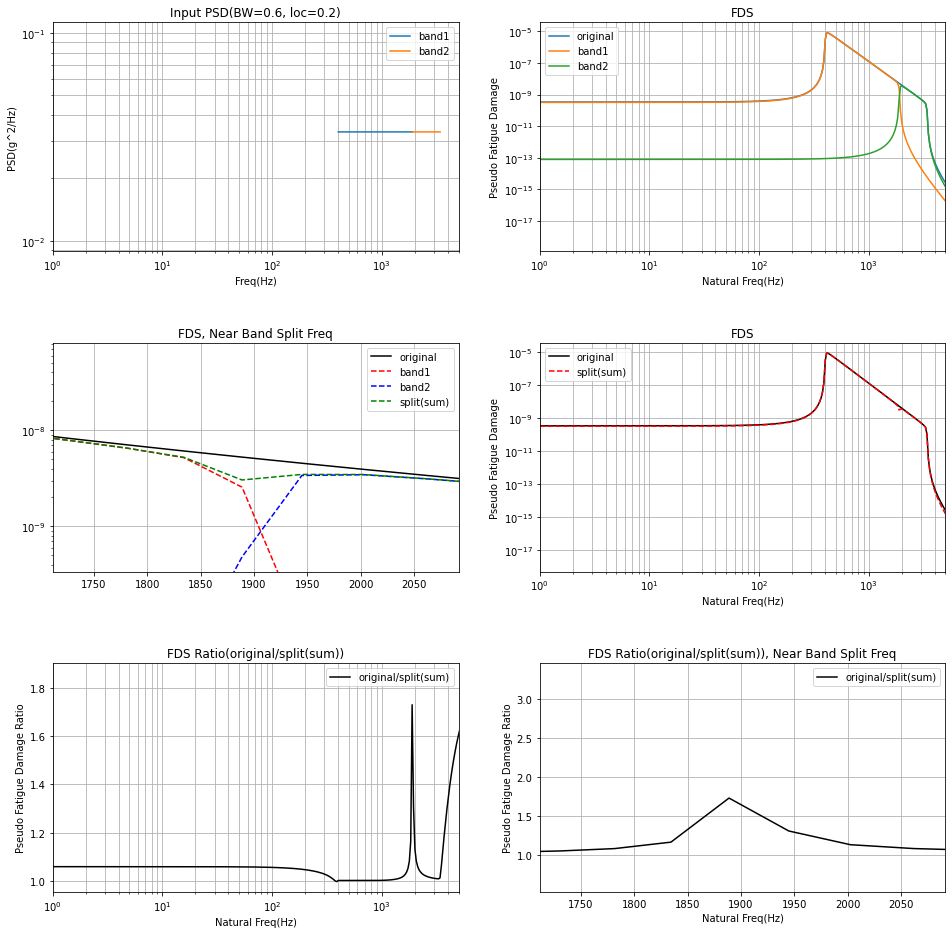

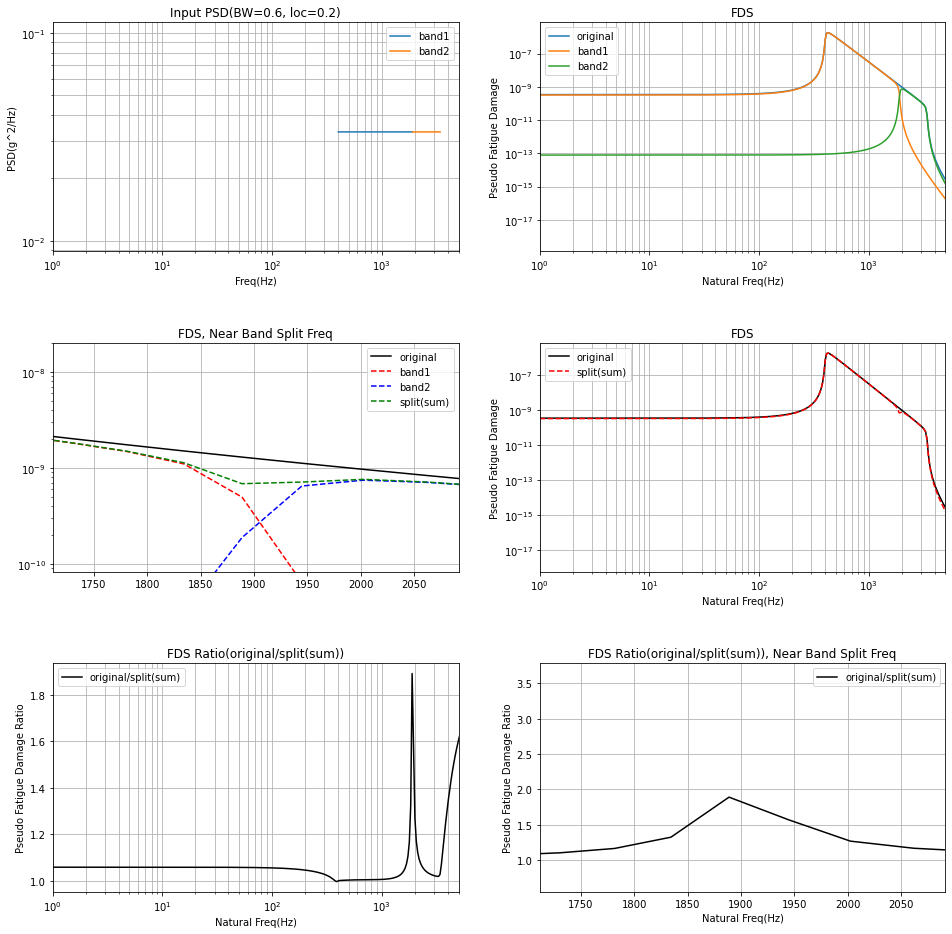

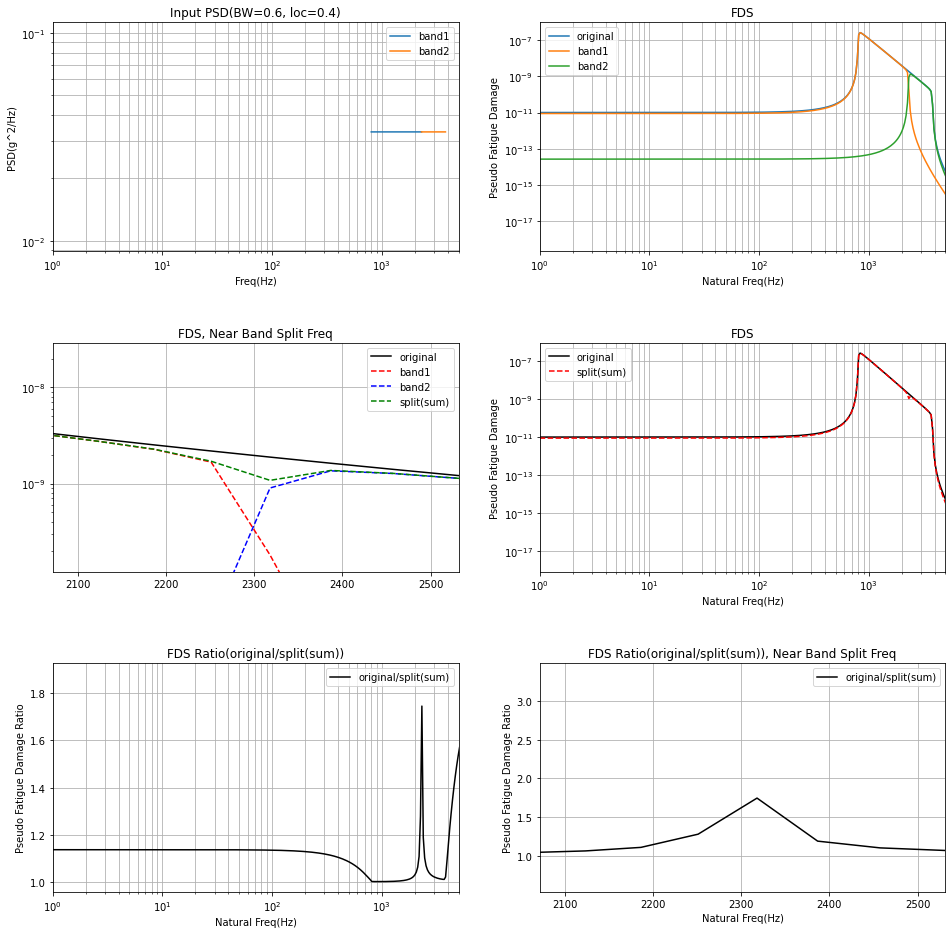

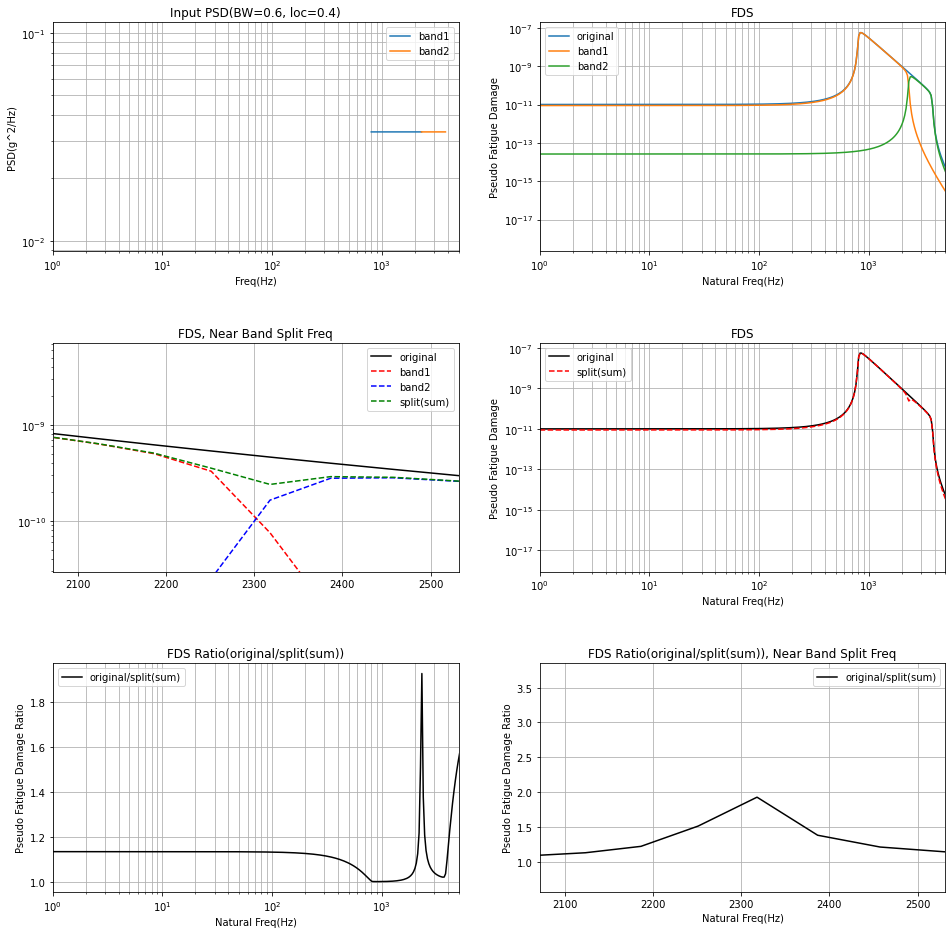

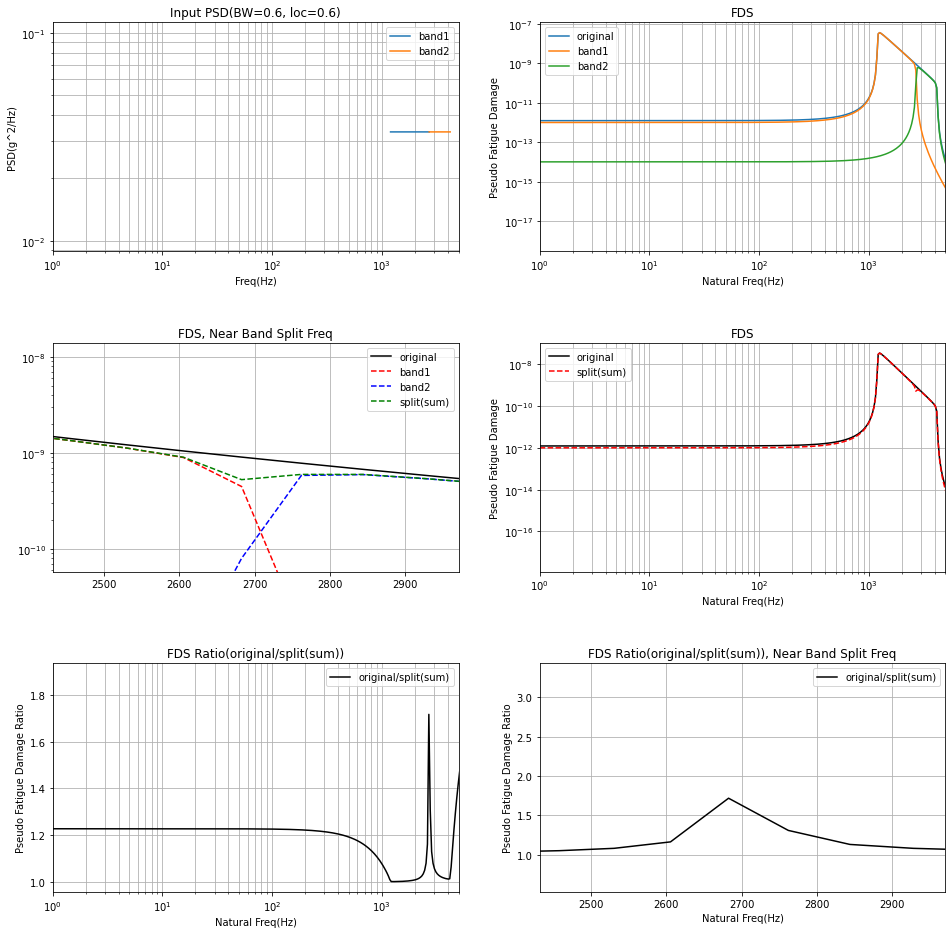

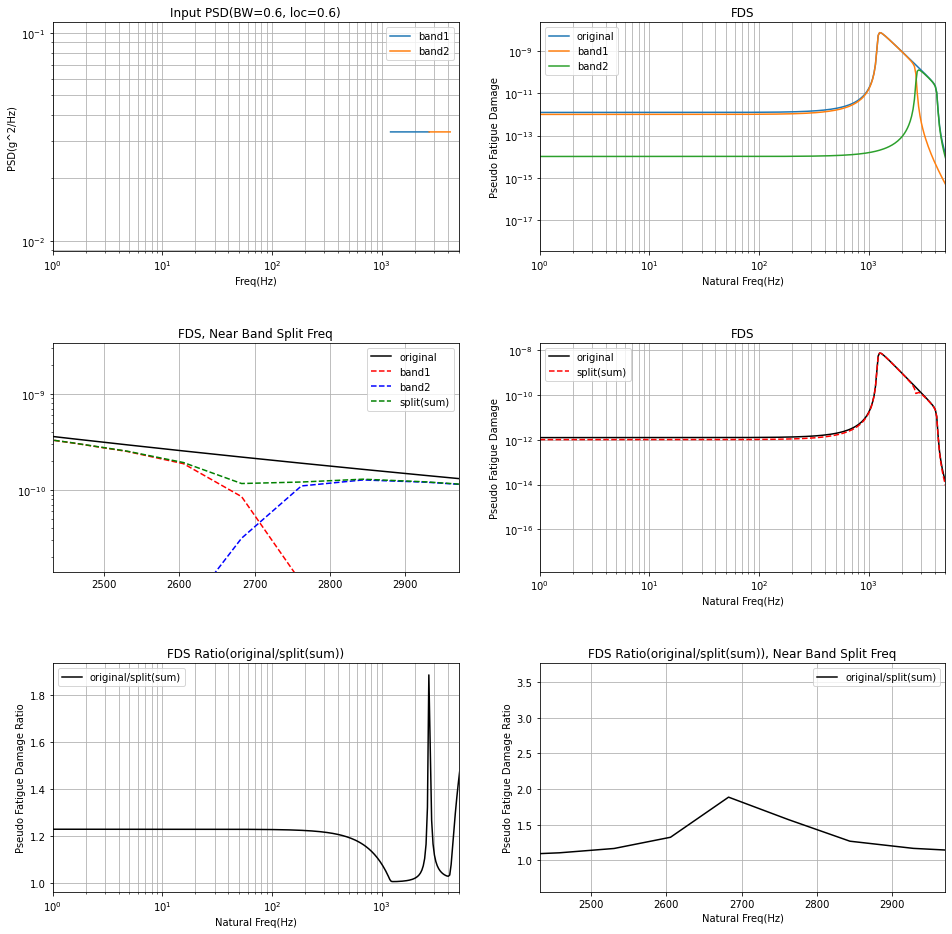

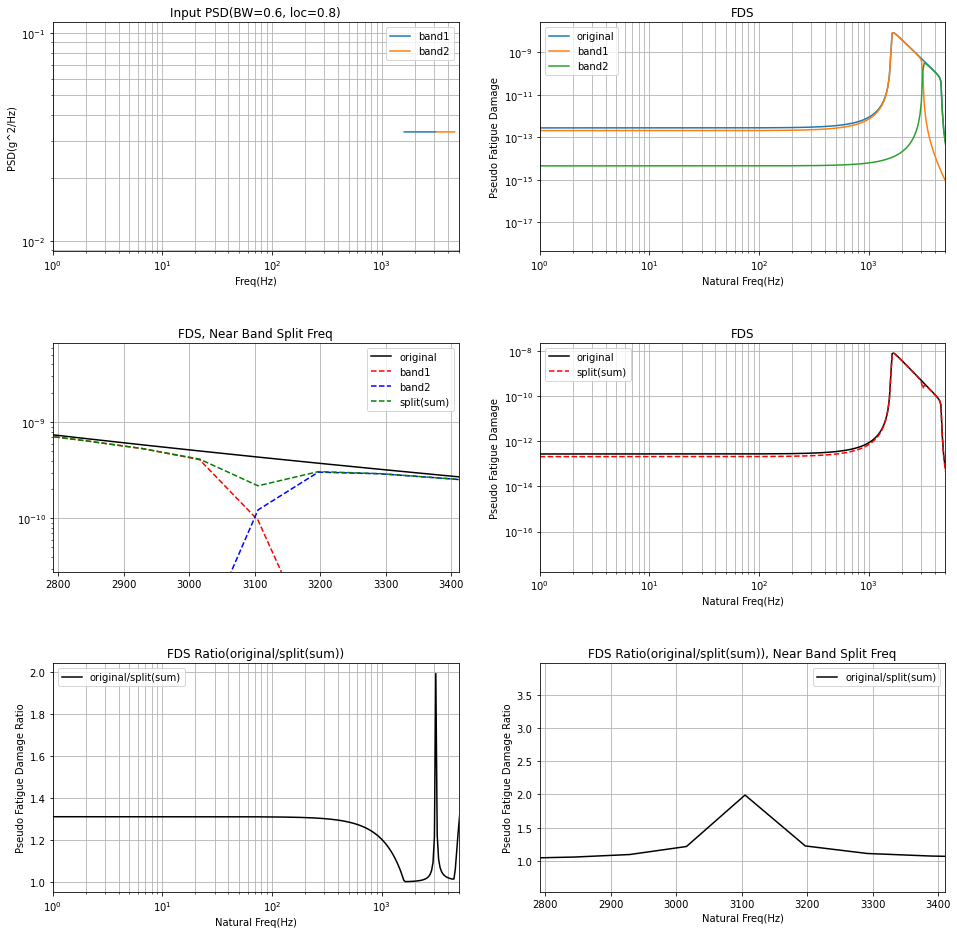

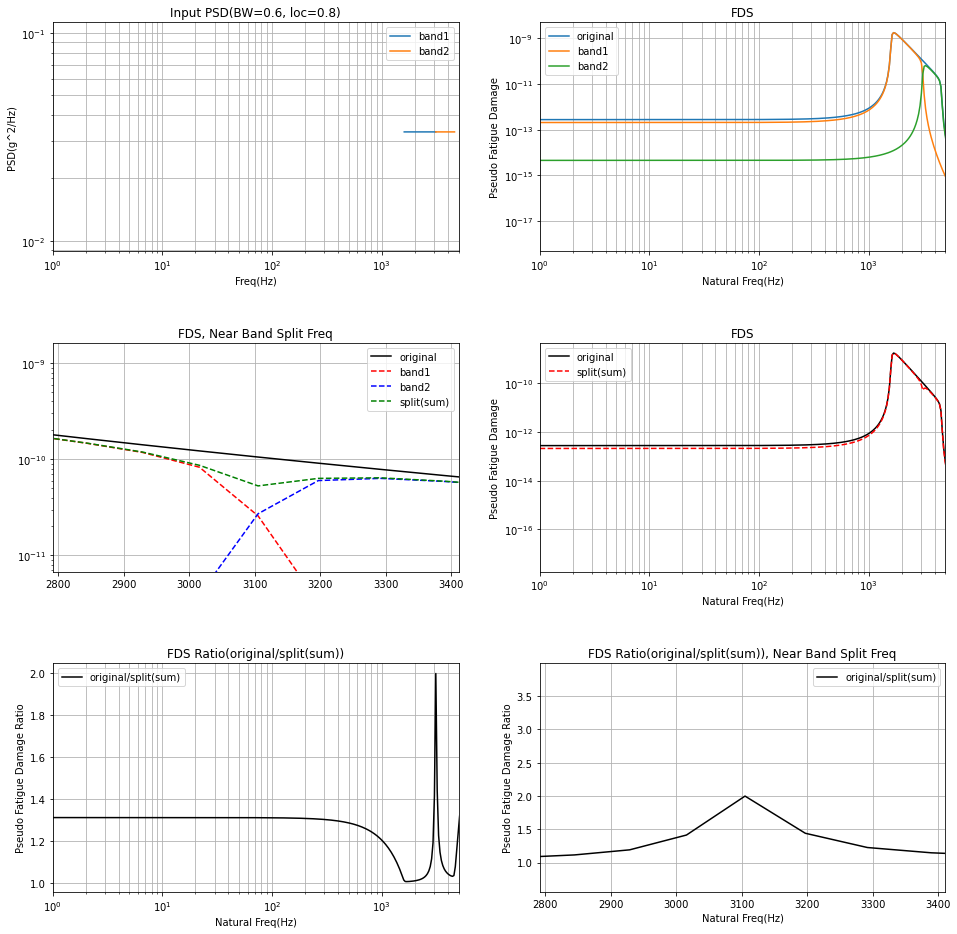

In [2]:
for i in range(1,6):
    for j in range(6):
        for z in range(1,3):
            z /= 100;
            # Generate Input PSD
            fmin = 1; fmax = 5000; bwp =i/5; loc = j/5;
            freq_spec,psd_spec = blwn(fmin,fmax,bwp,loc);
            # Band Split
            fi = np.linspace(min(freq_spec),max(freq_spec),5000);
            pi = log_interp(fi,freq_spec,psd_spec);
            dfi,dpi = band_split(fi,pi,2);
            # Calculate FDS
            fn,D = FDS_dirlik(fi     ,pi    ,zeta=z,m=4,T=1,C=1);
            fn,D1 = FDS_dirlik(dfi[0],dpi[0],zeta=z,m=4,T=1,C=1);
            fn,D2 = FDS_dirlik(dfi[1],dpi[1],zeta=z,m=4,T=1,C=1);
            # Plot
            plt.figure(figsize=(16,16));
            plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
            plt.subplot(321);
            plt.plot(dfi[0],dpi[0],label='band1'); plt.plot(dfi[1],dpi[1],label='band2'); plt.legend();
            plt.xscale('log'); plt.yscale('log'); plt.xlim(fmin,fmax); plt.title('Input PSD(BW=%.1f, loc=%.1f)'%(bwp,loc)); plt.xlabel('Freq(Hz)'); plt.ylabel('PSD(g^2/Hz)');
            plt.grid(b=True, which='both', linestyle='-');
            plt.subplot(322);
            plt.plot(fn,D,label='original'); plt.plot(fn,D1,label='band1'); plt.plot(fn,D2,label='band2'); 
            plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
            plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
            plt.grid(b=True, which='both', linestyle='-');
            plt.subplot(323);
            xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
            ylim1 = min(D[(fn>xlim1)&(fn<xlim2)])*0.1; 
            ylim2 = max(D[(fn>xlim1)&(fn<xlim2)])*10; 
            plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1,'r--',label='band1'); plt.plot(fn,D2,'b--',label='band2'); 
            plt.plot(fn,D1+D2,'g--',label='split(sum)');  plt.yscale('log');
            plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
            plt.title('FDS, Near Band Split Freq');
            plt.grid(b=True, which='major', linestyle='-');
            plt.subplot(324);
            plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1+D2,'r--',label='split(sum)');  
            plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
            plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
            plt.grid(b=True, which='both', linestyle='-');
            plt.subplot(325);
            rD = D/(D1+D2);
            plt.plot(fn,rD,'k-',label='original/split(sum)');
            plt.legend(); plt.xlim(fmin,fmax);
            plt.xscale('log'); plt.title('FDS Ratio(original/split(sum))'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');
            plt.grid(b=True, which='both', linestyle='-');
            plt.subplot(326);
            plt.plot(fn,rD,'k-',label='original/split(sum)');
            ylim1 = min(rD[(fn>xlim1)&(fn<xlim2)])*0.5; ylim2 = max(rD[(fn>xlim1)&(fn<xlim2)])*2;
            plt.grid(which='both'); plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
            plt.title('FDS Ratio(original/split(sum)), Near Band Split Freq'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');\
            plt.grid(b=True, which='both', linestyle='-');
            plt.savefig('blwn_BW%.1f_LOC%.1f_%dd_4m_x1.png'%(bwp,loc,z), dpi=300);  # Bandwidth, Location, 1% damping FDS, m = 4
            plt.close();

## Overlapping Loop

In [ ]:
for i in range(1,10):
    for j in range(10):
        # Generate Input PSD
        fmin = 1; fmax = 5000; bwp =i/10; loc = j/10;
        freq_spec,psd_spec = blwn(fmin,fmax,bwp,loc);
        # Band Split
        fi = np.linspace(min(freq_spec),max(freq_spec),10000);
        pi = log_interp(fi,freq_spec,psd_spec);
        dfi,dpi = band_split(fi,pi,2);
        xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
        dfi,dpi = bs_overlap(dfi,dpi,0.1); # 10 % overlap
        # Calculate FDS
        fn,D = FDS_dirlik(fi,pi,zeta=0.01,m=4,T=1,C=1);
        fn,D1 = FDS_dirlik(dfi[0],dpi[0],zeta=0.01,m=4,T=1,C=1);
        fn,D2 = FDS_dirlik(dfi[1],dpi[1],zeta=0.01,m=4,T=1,C=1);
        # Plot
        plt.figure(figsize=(16,16));
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
        plt.subplot(321);
        plt.plot(dfi[0],dpi[0],label='band1'); plt.plot(dfi[1],dpi[1],label='band2'); plt.legend();
        plt.xscale('log'); plt.yscale('log'); plt.xlim(fmin,fmax); plt.title('Input PSD(BW=%.1f, loc=%.1f)'%(bwp,loc)); plt.xlabel('Freq(Hz)'); plt.ylabel('PSD(g^2/Hz)');
        plt.grid(b=True, which='both', linestyle='-');
        plt.subplot(322);
        plt.plot(fn,D,label='original'); plt.plot(fn,D1,label='band1'); plt.plot(fn,D2,label='band2'); 
        plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
        plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
        plt.grid(b=True, which='both', linestyle='-');
        plt.subplot(323);       
        ylim1 = min(D[(fn>xlim1)&(fn<xlim2)])*0.1; 
        ylim2 = max(D[(fn>xlim1)&(fn<xlim2)])*10; 
        plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1,'r--',label='band1'); plt.plot(fn,D2,'b--',label='band2'); 
        plt.plot(fn,D1+D2,'g--',label='split(sum)');  plt.yscale('log');
        plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
        plt.title('FDS, Near Band Split Freq');
        plt.grid(b=True, which='major', linestyle='-');
        plt.subplot(324);
        plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1+D2,'r--',label='split(sum)');  
        plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
        plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
        plt.grid(b=True, which='both', linestyle='-');
        plt.subplot(325);
        rD = D/(D1+D2);
        plt.plot(fn,rD,'k-',label='original/split(sum)');
        plt.legend(); plt.xlim(fmin,fmax);
        plt.xscale('log'); plt.title('FDS Ratio(original/split(sum))'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');
        plt.grid(b=True, which='both', linestyle='-');
        plt.subplot(326);
        plt.plot(fn,rD,'k-',label='original/split(sum)');
        ylim1 = min(rD[(fn>xlim1)&(fn<xlim2)])*0.5; ylim2 = max(rD[(fn>xlim1)&(fn<xlim2)])*2;
        plt.grid(which='both'); plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
        plt.title('FDS Ratio(original/split(sum)), Near Band Split Freq'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');\
        plt.grid(b=True, which='both', linestyle='-');
        plt.savefig('blwn_BW%.1f_LOC%.1f_1d_4m_10ol.png'%(bwp,loc), dpi=300); # Bandwidth, Location, 1% damping FDS, m=4, 10% overlap

## Overlapping Test

In [ ]:
i = 10; j = 0;
# Generate Input PSD
fmin = 1; fmax = 5000; bwp =i/10; loc = j/10;
freq_spec,psd_spec = blwn(fmin,fmax,bwp,loc);
# Band Split
fi = np.linspace(min(freq_spec),max(freq_spec),10000);
pi = log_interp(fi,freq_spec,psd_spec);
dfi,dpi = band_split(fi,pi,2);
dfi,dpi = bs_overlap(dfi,dpi,0.01); # 1 % overlap
# Calculate FDS
fn,D =  FDS_dirlik(fi   ,pi     ,zeta=0.05, m=4,T=1,C=1);
fn,D1 = FDS_dirlik(dfi[0],dpi[0]*1,zeta=0.05 ,m=4,T=1,C=1);
fn,D2 = FDS_dirlik(dfi[1],dpi[1]*1,zeta=0.05 ,m=4,T=1,C=1);

In [ ]:
# Plot
plt.figure(figsize=(16,16));
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.4)
plt.subplot(321);
plt.plot(dfi[0],dpi[0],label='band1'); plt.plot(dfi[1],dpi[1],label='band2'); plt.legend();
plt.xscale('log'); plt.yscale('log'); plt.xlim(fmin,fmax); plt.title('Input PSD(BW=%.1f, loc=%.1f)'%(bwp,loc)); plt.xlabel('Freq(Hz)'); plt.ylabel('PSD(g^2/Hz)');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(322);
plt.plot(fn,D,label='original'); plt.plot(fn,D1,label='band1'); plt.plot(fn,D2,label='band2'); 
plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(323);
xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
ylim1 = min(D[(fn>xlim1)&(fn<xlim2)])*0.1; 
ylim2 = max(D[(fn>xlim1)&(fn<xlim2)])*10; 
plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1,'r--',label='band1'); plt.plot(fn,D2,'b--',label='band2'); 
plt.plot(fn,D1+D2,'g--',label='split(sum)');  plt.yscale('log');
plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
plt.title('FDS, Near Band Split Freq');
plt.grid(b=True, which='major', linestyle='-');
plt.subplot(324);
plt.plot(fn,D,'k-',label='original'); plt.plot(fn,D1+D2,'r--',label='split(sum)');  
plt.xscale('log'); plt.yscale('log'); plt.legend(); plt.xlim(fmin,fmax);
plt.title('FDS'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(325);
rD = D/(D1+D2);
plt.plot(fn,rD,'k-',label='original/split(sum)');
plt.legend(); plt.xlim(fmin,fmax);
plt.xscale('log'); plt.title('FDS Ratio(original/split(sum))'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');
plt.grid(b=True, which='both', linestyle='-');
plt.subplot(326);
plt.plot(fn,rD,'k-',label='original/split(sum)');
ylim1 = min(rD[(fn>xlim1)&(fn<xlim2)])*0.5; ylim2 = max(rD[(fn>xlim1)&(fn<xlim2)])*2;
plt.grid(which='both'); plt.legend(); plt.xlim(xlim1,xlim2); plt.ylim(ylim1,ylim2);
plt.title('FDS Ratio(original/split(sum)), Near Band Split Freq'); plt.xlabel('Natural Freq(Hz)'); plt.ylabel('Pseudo Fatigue Damage Ratio');\
plt.grid(b=True, which='both', linestyle='-');
plt.savefig('blwn_BW%.1f_LOC%.1f_5d_4m_1ol_x1.png'%(bwp,loc), dpi=300); # Bandwidth, Location, 1% damping FDS, m=4, 1% overlap